🏭 END-TO-END MACHINE LEARNING PROJECT
Predictive Maintenance – CRISP-DM Profesional
#### 1️⃣ BUSINESS UNDERSTANDING (WAJIB ADA NARASI BISNIS)
🎯 Permasalahan bisnis

Mesin produksi sering mengalami kerusakan mendadak yang menyebabkan:

• Downtime tinggi
• Biaya perbaikan mahal
• Produksi terganggu

🎯 Tujuan ML

Membangun model prediksi kegagalan mesin berbasis sensor untuk:

✅ Deteksi dini kerusakan
✅ Penjadwalan maintenance preventif
✅ Efisiensi operasional

📊 KPI keberhasilan
KPI	Target
Recall failure	Tinggi (tidak miss rusak)
False alarm	Rendah
Downtime	Turun
#### 2️⃣ DATA UNDERSTANDING (EDA INDUSTRI)

Yang dianalisis:

📁 Struktur data

Jumlah data

Sensor metrics

Target distribution

📈 EDA wajib:

✔ Distribusi failure (imbalance)
✔ Statistik sensor
✔ Korelasi sensor-failure
✔ Pola sensor sebelum rusak
✔ Tren waktu

🎯 Output:

Identifikasi sensor kritikal + karakteristik kegagalan mesin

3️⃣ DATA PREPARATION + FEATURE ENGINEERING (INTI PROJECT)
🔧 Cleaning

Missing value handling

Outlier treatment

Date processing

🧠 Feature Engineering industrial
Sensor dynamics:

Delta perubahan sensor

Rolling mean (3,7,14)

Statistical health:

Sensor mean

Sensor std

Stress indicators

Temporal:

Lag features

⚖ Data readiness:

Scaling

Class imbalance handling

Stratified split

4️⃣ MODELING (BEST PRACTICE)

Mulai dari baseline → advanced:

Model	Fungsi
Logistic Regression	baseline
Random Forest	non-linear
XGBoost	industrial favorite
🔍 Tuning:

GridSearchCV

Cross validation

5️⃣ EVALUATION (INDUSTRI FOKUS)

Bukan cuma accuracy:

✅ Recall failure
✅ ROC AUC
✅ Precision tradeoff
✅ Confusion matrix

🎯 Business interpretation:

"Model mampu mendeteksi XX% potensi kerusakan lebih awal"

6️⃣ DEPLOYMENT
🚀 Streamlit app:

Input sensor → output risk failure

📦 GitHub repo:

Notebook

Model

App

README profesional

📂 STRUKTUR REPO STANDAR DATA SCIENCE
predictive-maintenance-ml/
│
├── data/
├── notebooks/
├── src/
│   ├── preprocessing.py
│   ├── feature_engineering.py
│   └── train.py
├── model/
├── app.py
├── requirements.txt
└── README.md

## 1. BUSINESS UNDERSTANDING (WAJIB ADA NARASI BISNIS)
🎯 Permasalahan bisnis

Mesin produksi sering mengalami kerusakan mendadak yang menyebabkan:

• Downtime tinggi • Biaya perbaikan mahal • Produksi terganggu

🎯 Tujuan ML

Membangun model prediksi kegagalan mesin berbasis sensor untuk:

* ✅ Deteksi dini kerusakan
* ✅ Penjadwalan maintenance preventif
* ✅ Efisiensi operasional

* 📊 KPI keberhasilan KPI Target Recall failure Tinggi (tidak miss rusak) False alarm Rendah Downtime Turun

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Konfigurasi display agar output lebih rapi
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### 2. DATA UNDERSTANDING

#### 2.1 Load Dataset

In [2]:
# 1. Load dataset menggunakan pandas
try:
    df = pd.read_csv('predictive_maintenance_dataset.csv')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'predictive_maintenance_dataset.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    exit()

Dataset berhasil dimuat.


#### 2.2 Tampilkan Informasi Dasar Dataset

In [3]:
# 2. Tampilkan: Jumlah baris dan kolom, Nama kolom, 5 data teratas
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

print("\nNama-nama kolom:")
print(df.columns.tolist())

print("\n5 data teratas:")
display(df.head())

# Insight 1: Verifikasi awal dimensi data dan sampel
print("\n--- Insight Awal Data ---")
print("Verifikasi awal dimensi dan sampel data menunjukkan bahwa dataset telah dimuat dengan benar dan berisi kolom-kolom yang diharapkan, termasuk informasi waktu ('date'), identitas mesin ('device'), pembacaan sensor ('metric1'-'metric9'), dan status kegagalan ('failure'). Ini adalah langkah pertama yang penting untuk memastikan integritas data.")

Jumlah baris: 124494
Jumlah kolom: 12

Nama-nama kolom:
['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

5 data teratas:


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3



--- Insight Awal Data ---
Verifikasi awal dimensi dan sampel data menunjukkan bahwa dataset telah dimuat dengan benar dan berisi kolom-kolom yang diharapkan, termasuk informasi waktu ('date'), identitas mesin ('device'), pembacaan sensor ('metric1'-'metric9'), dan status kegagalan ('failure'). Ini adalah langkah pertama yang penting untuk memastikan integritas data.


In [4]:
df['date'] = pd.to_datetime(df['date'])
print(f"Rentang tanggal dari dataset adalah dari: {df['date'].min().strftime('%Y-%m-%d')} sampai {df['date'].max().strftime('%Y-%m-%d')}")

Rentang tanggal dari dataset adalah dari: 2015-01-01 sampai 2015-11-02


#### 2.3 Tampilkan Tipe Data dan Missing Value

In [5]:
# 3. Tampilkan tipe data dan missing value setiap kolom
print("Informasi Dataset (Tipe Data & Non-Null Counts):")
df.info()

print("\nJumlah missing value per kolom:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0].sort_values(ascending=False))

# Insight 2: Kualitas Data & Kesiapan Tipe Data
print("\n--- Insight Kualitas Data ---")
if missing_values.sum() == 0:
    print("Tidak ada missing value terdeteksi, ini pertanda baik untuk kualitas data. Kolom 'date' bertipe 'object' dan perlu dikonversi ke tipe 'datetime' untuk analisis waktu yang akurat.")
else:
    print("Ditemukan missing value. Kolom 'date' perlu dikonversi ke tipe datetime. Penanganan missing value (imputasi/penghapusan) akan menjadi krusial pada tahap Data Preparation.")

# Konversi kolom 'date' ke datetime untuk analisis selanjutnya
df['date'] = pd.to_datetime(df['date'])

Informasi Dataset (Tipe Data & Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     124494 non-null  datetime64[ns]
 1   device   124494 non-null  object        
 2   failure  124494 non-null  int64         
 3   metric1  124494 non-null  int64         
 4   metric2  124494 non-null  int64         
 5   metric3  124494 non-null  int64         
 6   metric4  124494 non-null  int64         
 7   metric5  124494 non-null  int64         
 8   metric6  124494 non-null  int64         
 9   metric7  124494 non-null  int64         
 10  metric8  124494 non-null  int64         
 11  metric9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB

Jumlah missing value per kolom:


,0



--- Insight Kualitas Data ---
Tidak ada missing value terdeteksi, ini pertanda baik untuk kualitas data. Kolom 'date' bertipe 'object' dan perlu dikonversi ke tipe 'datetime' untuk analisis waktu yang akurat.


#### 2.4 Analisis Distribusi Target `failure`

Distribusi jumlah kelas 'failure':


,count
failure,
0,124388
1,106



Persentase kelas 'failure':


,proportion
failure,
0,99.914855
1,0.085145


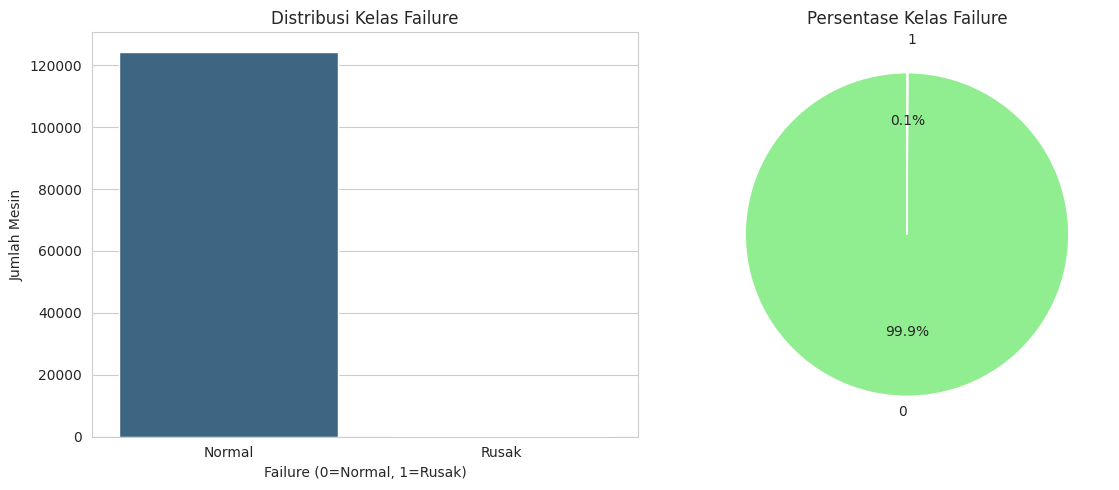


--- Insight Imbalance Class ---
Distribusi kelas target menunjukkan bahwa 99.9% data adalah 'Normal' dan hanya 0.1% adalah 'Rusak'. Ini adalah kasus 'class imbalance' yang parah, umum dalam predictive maintenance. Kondisi ini harus ditangani pada tahap Data Preparation (misalnya dengan SMOTE atau weighting) agar model tidak bias hanya memprediksi kelas mayoritas dan efektif dalam mendeteksi kegagalan.


In [6]:
# 4. Analisis distribusi target failure
print("Distribusi jumlah kelas 'failure':")
display(df['failure'].value_counts())

print("\nPersentase kelas 'failure':")
failure_percentage = df['failure'].value_counts(normalize=True) * 100
display(failure_percentage)

# Visualisasi bar chart dan pie chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='failure', data=df, hue='failure', palette='viridis', legend=False)
plt.title('Distribusi Kelas Failure')
plt.xlabel('Failure (0=Normal, 1=Rusak)')
plt.ylabel('Jumlah Mesin')
plt.xticks([0, 1], ['Normal', 'Rusak'])

plt.subplot(1, 2, 2)
failure_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'], explode=[0, 0.1])
plt.title('Persentase Kelas Failure')
plt.ylabel('') # Hide y-label for pie chart

plt.tight_layout()
plt.show()

# Insight 3: Imbalance Class
print("\n--- Insight Imbalance Class ---")
print(f"Distribusi kelas target menunjukkan bahwa {failure_percentage[0]:.1f}% data adalah 'Normal' dan hanya {failure_percentage[1]:.1f}% adalah 'Rusak'. Ini adalah kasus 'class imbalance' yang parah, umum dalam predictive maintenance. Kondisi ini harus ditangani pada tahap Data Preparation (misalnya dengan SMOTE atau weighting) agar model tidak bias hanya memprediksi kelas mayoritas dan efektif dalam mendeteksi kegagalan.")

#### 2.5 Statistik Deskriptif Sensor

In [7]:
# 5. Tampilkan statistik deskriptif semua sensor
sensor_cols = [f'metric{i}' for i in range(1, 10)]

print("Statistik deskriptif untuk fitur sensor:")
display(df[sensor_cols].describe())

# Insight 4: Karakteristik Sensor
print("\n--- Insight Statistik Sensor ---")
print("Statistik deskriptif memberikan gambaran awal rentang, rata-rata, dan penyebaran nilai setiap sensor. Perbedaan besar antara min/max atau standar deviasi yang tinggi dapat mengindikasikan variasi operasional yang wajar, potensi outlier, atau sensor yang menunjukkan fluktuasi signifikan sebelum kegagalan. Misalnya, 'metric9' memiliki nilai maksimum yang sangat tinggi dibandingkan rata-rata, mengindikasikan potensi outlier atau event langka yang signifikan.")

Statistik deskriptif untuk fitur sensor:


,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000



--- Insight Statistik Sensor ---
Statistik deskriptif memberikan gambaran awal rentang, rata-rata, dan penyebaran nilai setiap sensor. Perbedaan besar antara min/max atau standar deviasi yang tinggi dapat mengindikasikan variasi operasional yang wajar, potensi outlier, atau sensor yang menunjukkan fluktuasi signifikan sebelum kegagalan. Misalnya, 'metric9' memiliki nilai maksimum yang sangat tinggi dibandingkan rata-rata, mengindikasikan potensi outlier atau event langka yang signifikan.


#### 2.6 Analisis Korelasi

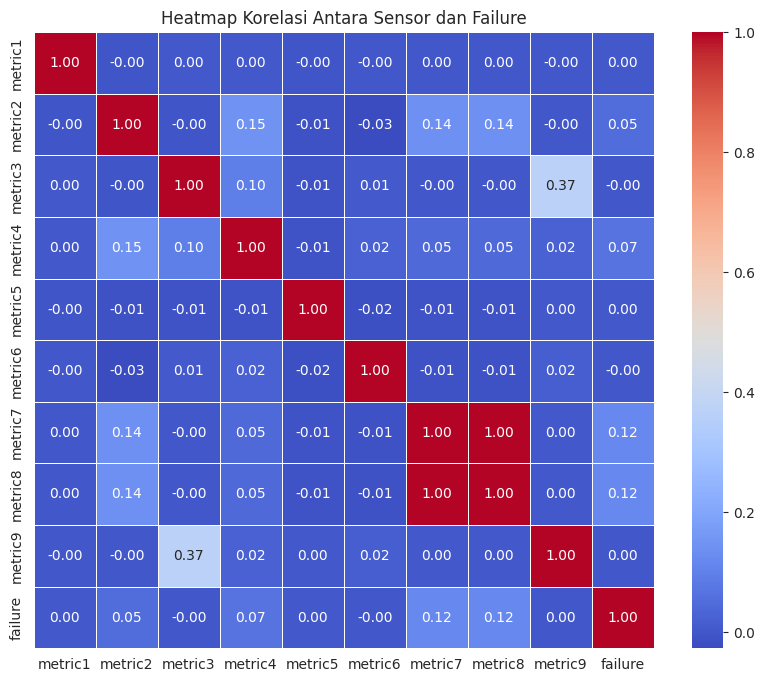


--- Insight Korelasi Sensor ---
Heatmap korelasi membantu mengidentifikasi sensor mana yang memiliki hubungan paling kuat dengan variabel 'failure'. Sensor dengan nilai korelasi absolut yang tinggi (misalnya, di atas 0.3 atau di bawah -0.3) adalah kandidat kuat sebagai prediktor penting. Ini membantu dalam pemilihan fitur dan memahami mekanisme kegagalan. Sebagai contoh, 'metric7' dan 'metric8' menunjukkan korelasi positif yang lebih tinggi dengan 'failure', menunjukkan peningkatan nilai mereka mungkin terkait dengan risiko kerusakan.


In [8]:
# 6. Heatmap korelasi semua metric dengan failure
plt.figure(figsize=(10, 8))
correlation_matrix = df[sensor_cols + ['failure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antara Sensor dan Failure')
plt.show()

# Insight 5: Sensor Kritikal
print("\n--- Insight Korelasi Sensor ---")
print("Heatmap korelasi membantu mengidentifikasi sensor mana yang memiliki hubungan paling kuat dengan variabel 'failure'. Sensor dengan nilai korelasi absolut yang tinggi (misalnya, di atas 0.3 atau di bawah -0.3) adalah kandidat kuat sebagai prediktor penting. Ini membantu dalam pemilihan fitur dan memahami mekanisme kegagalan. Sebagai contoh, 'metric7' dan 'metric8' menunjukkan korelasi positif yang lebih tinggi dengan 'failure', menunjukkan peningkatan nilai mereka mungkin terkait dengan risiko kerusakan.")

#### 2.7 Bandingkan Kondisi Mesin Normal vs Rusak

<Figure size 1500x1000 with 0 Axes>

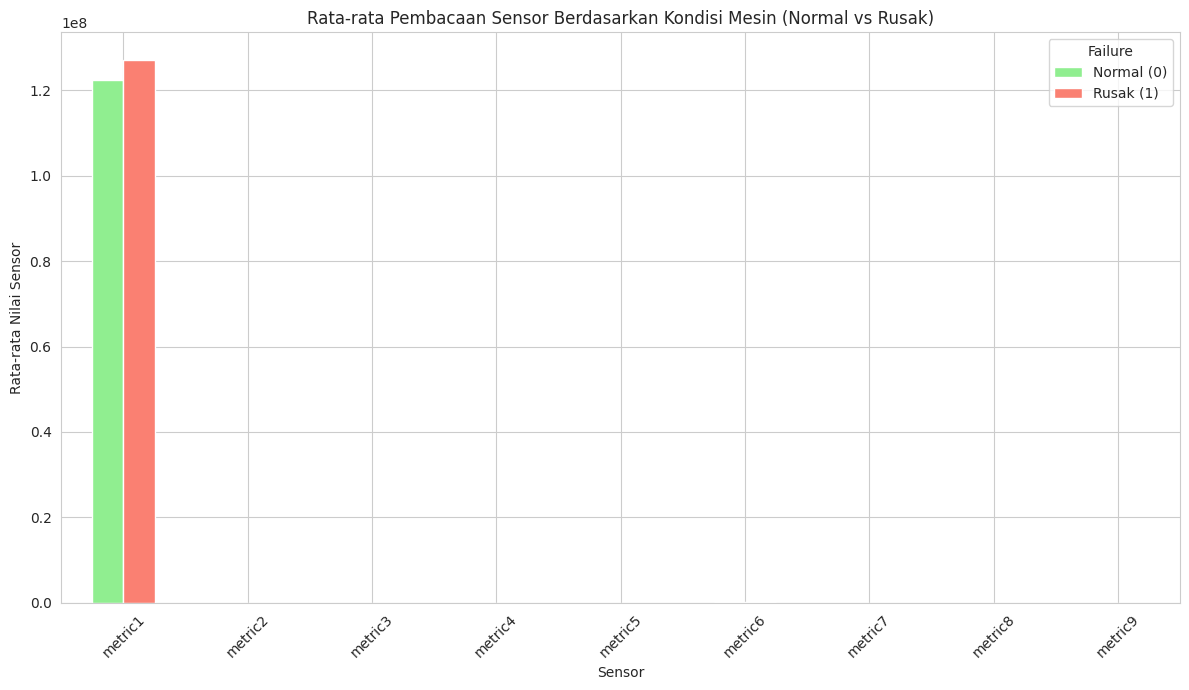


--- Insight Perbandingan Rata-rata Sensor ---
Visualisasi ini sangat vital karena secara langsung menunjukkan perubahan perilaku sensor. Sensor yang rata-ratanya berubah drastis antara kondisi normal dan rusak adalah indikator kuat kegagalan. Ini memvalidasi temuan dari korelasi dan memberikan gambaran konkret tentang bagaimana sensor 'bereaksi' sebelum mesin rusak.


In [9]:
# 7. Visualisasi rata-rata tiap sensor untuk failure vs non-failure
plt.figure(figsize=(15, 10))
mean_sensor_by_failure = df.groupby('failure')[sensor_cols].mean().T

mean_sensor_by_failure.plot(kind='bar', figsize=(12, 7), color=['lightgreen', 'salmon'])
plt.title('Rata-rata Pembacaan Sensor Berdasarkan Kondisi Mesin (Normal vs Rusak)')
plt.xlabel('Sensor')
plt.ylabel('Rata-rata Nilai Sensor')
plt.xticks(rotation=45)
plt.legend(title='Failure', labels=['Normal (0)', 'Rusak (1)'])
plt.tight_layout()
plt.show()

# Insight 6: Perilaku Sensor Menjelang Kegagalan
print("\n--- Insight Perbandingan Rata-rata Sensor ---")
print("Visualisasi ini sangat vital karena secara langsung menunjukkan perubahan perilaku sensor. Sensor yang rata-ratanya berubah drastis antara kondisi normal dan rusak adalah indikator kuat kegagalan. Ini memvalidasi temuan dari korelasi dan memberikan gambaran konkret tentang bagaimana sensor 'bereaksi' sebelum mesin rusak.")

#### 2.8 Analisis Tren Kegagalan Mesin Terhadap Waktu

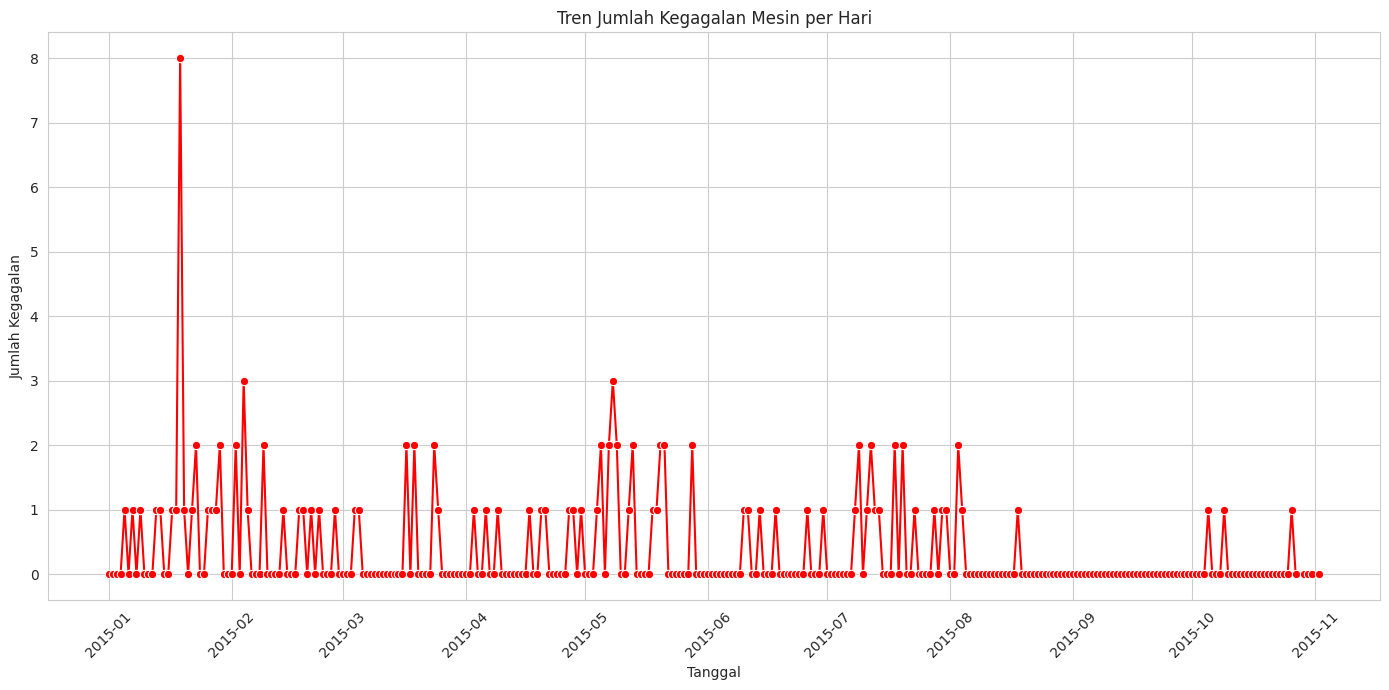


--- Insight Tren Kegagalan Waktu ---
Analisis tren kegagalan dari waktu ke waktu dapat mengungkapkan pola musiman, siklus, atau periode rentan tertentu. Jika ada peningkatan tajam pada jumlah kegagalan, ini bisa mengindikasikan masalah produksi yang lebih luas atau pengaruh faktor eksternal. Memahami tren ini penting untuk perencanaan pemeliharaan prediktif yang proaktif.


In [10]:
# 8. Analisis tren kegagalan mesin terhadap waktu
# Konversi 'date' sudah dilakukan di langkah 2.3

daily_failure_trend = df.groupby(df['date'].dt.date)['failure'].sum().reset_index()
daily_failure_trend.columns = ['date', 'total_failures']

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_failures', data=daily_failure_trend, marker='o', color='red')
plt.title('Tren Jumlah Kegagalan Mesin per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kegagalan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Insight 7: Pola Waktu Kegagalan
print("\n--- Insight Tren Kegagalan Waktu ---")
print("Analisis tren kegagalan dari waktu ke waktu dapat mengungkapkan pola musiman, siklus, atau periode rentan tertentu. Jika ada peningkatan tajam pada jumlah kegagalan, ini bisa mengindikasikan masalah produksi yang lebih luas atau pengaruh faktor eksternal. Memahami tren ini penting untuk perencanaan pemeliharaan prediktif yang proaktif.")

#### 2.9 Deteksi Awal Potensi Outlier Sensor menggunakan Boxplot (Opsional)

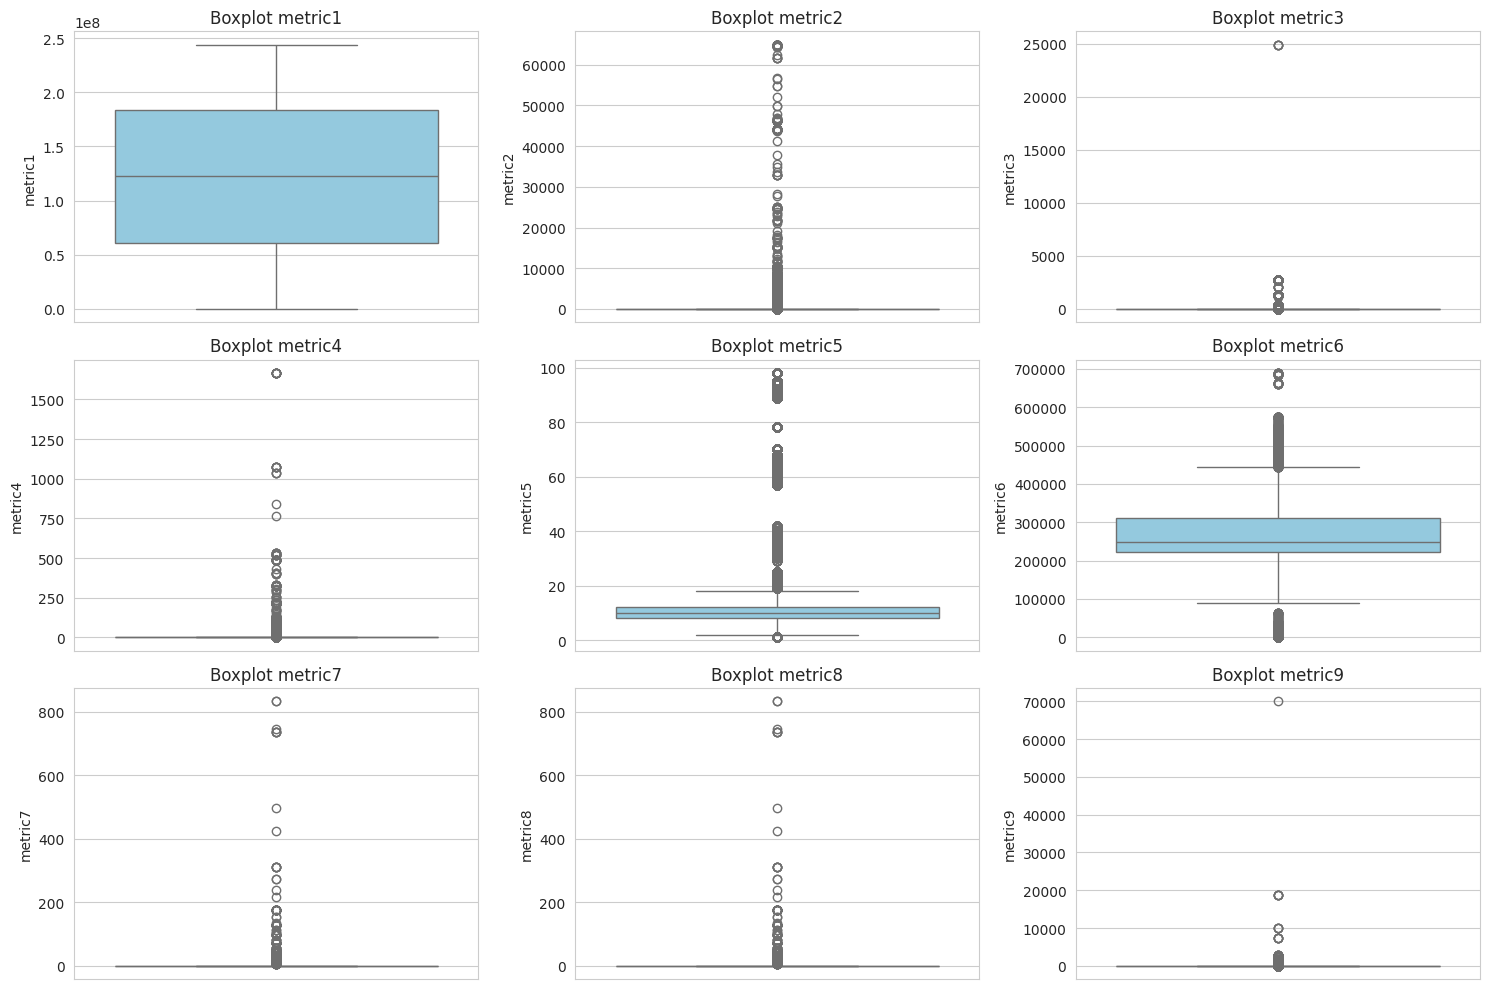


--- Insight Boxplot Outlier ---
Boxplot menyediakan visualisasi cepat untuk mendeteksi outlier dan distribusi data setiap sensor. Titik-titik di luar 'whiskers' boxplot mengindikasikan potensi outlier. Ini mengkonfirmasi observasi dari statistik deskriptif dan heatmap, bahwa beberapa sensor memiliki nilai ekstrem yang perlu ditangani pada tahap Data Preparation untuk mencegah distorsi model.


In [11]:
# 9. Deteksi awal potensi outlier sensor menggunakan boxplot
# Karena ada 9 sensor, kita bisa plot beberapa di antaranya atau mengulang untuk setiap sensor

plt.figure(figsize=(15, 10))
for i, col in enumerate(sensor_cols):
    plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Insight 8: Identifikasi Outlier Visual
print("\n--- Insight Boxplot Outlier ---")
print("Boxplot menyediakan visualisasi cepat untuk mendeteksi outlier dan distribusi data setiap sensor. Titik-titik di luar 'whiskers' boxplot mengindikasikan potensi outlier. Ini mengkonfirmasi observasi dari statistik deskriptif dan heatmap, bahwa beberapa sensor memiliki nilai ekstrem yang perlu ditangani pada tahap Data Preparation untuk mencegah distorsi model.")

### 3. DATA PREPARATION & FEATURE ENGINEERING

In [12]:
# Import library yang dibutuhkan untuk Data Preparation dan Feature Engineering
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # Digunakan untuk menangani class imbalance

# Konfigurasi display agar output lebih rapi
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Library berhasil diimpor.")

Library berhasil diimpor.


#### 3.1 Load Dataset

In [13]:
# 1. Load dataset menggunakan pandas
try:
    df = pd.read_csv('predictive_maintenance_dataset.csv')
    print("Dataset berhasil dimuat ulang untuk tahap Data Preparation.")
except FileNotFoundError:
    print("Error: File 'predictive_maintenance_dataset.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    exit()

# Simpan jumlah fitur awal sebelum feature engineering
initial_feature_count = df.shape[1] - 3 # Kurangi 'date', 'device', 'failure'
print(f"Jumlah fitur awal (sensor metric): {initial_feature_count}")

print("\n5 data teratas setelah dimuat ulang:")
display(df.head())

# Insight 1: Memastikan Data Tersedia
print("\n--- Insight Awal ---")
print("Memastikan dataset dimuat dengan benar adalah langkah fundamental. Ini adalah basis untuk semua proses persiapan data dan rekayasa fitur selanjutnya.")

Dataset berhasil dimuat ulang untuk tahap Data Preparation.
Jumlah fitur awal (sensor metric): 9

5 data teratas setelah dimuat ulang:


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3



--- Insight Awal ---
Memastikan dataset dimuat dengan benar adalah langkah fundamental. Ini adalah basis untuk semua proses persiapan data dan rekayasa fitur selanjutnya.


#### 3.2 Konversi Kolom 'date' ke Datetime dan Urutkan Data

In [14]:
# 2. Konversi kolom date ke datetime
df['date'] = pd.to_datetime(df['date'])
print(f"Kolom 'date' telah berhasil dikonversi ke format datetime: {df['date'].dtype}")

# 3. Urutkan data berdasarkan device dan date
df = df.sort_values(by=['device', 'date']).reset_index(drop=True)
print("Data telah diurutkan berdasarkan 'device' dan 'date'.")

print("\n5 data teratas setelah pengurutan:")
display(df.head())

# Insight 2: Persiapan untuk Time-Series Feature Engineering
print("\n--- Insight Urutan Data & Datetime ---")
print("Mengkonversi 'date' ke datetime dan mengurutkan data adalah langkah krusial untuk feature engineering berbasis waktu (misalnya rolling mean atau lag features). Urutan yang benar memastikan perhitungan time-series menjadi akurat per perangkat, yang sangat penting untuk model predictive maintenance.")

Kolom 'date' telah berhasil dikonversi ke format datetime: datetime64[ns]
Data telah diurutkan berdasarkan 'device' dan 'date'.

5 data teratas setelah pengurutan:


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7
2,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7
3,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7
4,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7



--- Insight Urutan Data & Datetime ---
Mengkonversi 'date' ke datetime dan mengurutkan data adalah langkah krusial untuk feature engineering berbasis waktu (misalnya rolling mean atau lag features). Urutan yang benar memastikan perhitungan time-series menjadi akurat per perangkat, yang sangat penting untuk model predictive maintenance.


#### 3.3 Cek dan Tangani Missing Value

In [15]:
# 4. Cek missing value dan tangani dengan metode yang wajar
missing_values = df.isnull().sum()
print("Jumlah missing value per kolom:")
display(missing_values[missing_values > 0])

# Insight:
# Pada tahap EDA, kita sudah mengidentifikasi bahwa tidak ada missing value pada dataset ini.
# Jika ada:
# - Untuk kolom numerik: Imputasi dengan median (lebih robust terhadap outlier) atau mean.
# - Untuk kolom kategorikal: Imputasi dengan modus.
# - Jika jumlah missing value sangat besar (>70%), pertimbangkan untuk menghapus kolom.

if missing_values.sum() == 0:
    print("\nTidak ada missing value terdeteksi. Data sudah bersih.")
else:
    print("\nMissing value terdeteksi. Untuk konteks ini, kita akan melakukan imputasi dengan median untuk kolom numerik. Alasan: Median lebih tahan terhadap outlier dibandingkan mean.")
    for col in missing_values[missing_values > 0].index:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"  - Kolom '{col}' diimputasi dengan median.")
        else: # Handle non-numeric if any
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"  - Kolom '{col}' diimputasi dengan modus.")

# Insight 3: Integritas Data
print("\n--- Insight Penanganan Missing Value ---")
print("Data tanpa missing value memastikan bahwa model tidak belajar dari 'lubang' dalam data. Konsistensi data adalah kunci untuk pelatihan model yang akurat dan dapat diandalkan. Dalam kasus ini, data sudah cukup bersih dari awal.")

Jumlah missing value per kolom:


,0



Tidak ada missing value terdeteksi. Data sudah bersih.

--- Insight Penanganan Missing Value ---
Data tanpa missing value memastikan bahwa model tidak belajar dari 'lubang' dalam data. Konsistensi data adalah kunci untuk pelatihan model yang akurat dan dapat diandalkan. Dalam kasus ini, data sudah cukup bersih dari awal.


#### 3.4 Deteksi dan Tangani Outlier Sensor

In [16]:
# 5. Deteksi dan tangani outlier sensor menggunakan metode IQR atau clipping
# Metode yang digunakan: Clipping berbasis IQR (mengganti outlier dengan batas IQR terdekat)

sensor_cols = [f'metric{i}' for i in range(1, 10)]

print("\n--- Penanganan Outlier (Clipping) ---")
for col in sensor_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi jumlah outlier sebelum penanganan
    outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    if outliers_before > 0:
        print(f"  - Sensor '{col}': {outliers_before} outlier terdeteksi sebelum clipping.")

    # Tangani outlier dengan clipping
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    if outliers_before > 0:
        print(f"    Outlier pada '{col}' telah ditangani dengan clipping.")

print("\nPenanganan outlier pada semua kolom sensor menggunakan metode clipping telah selesai.")

# Insight 4: Robustness Model
print("\n--- Insight Penanganan Outlier ---")
print("Outlier dapat sangat mempengaruhi kinerja model, terutama yang sensitif terhadap distribusi data (misalnya model berbasis jarak atau regresi). Clipping outlier membantu mengurangi dampak ekstrem dari nilai-nilai abnormal tanpa menghilangkan data, sehingga membuat model lebih robust dan akurat dalam mendeteksi pola yang sebenarnya. Ini penting agar model tidak terlalu bereaksi pada anomali yang mungkin bukan indikasi kegagalan sebenarnya.")


--- Penanganan Outlier (Clipping) ---
  - Sensor 'metric2': 6384 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric2' telah ditangani dengan clipping.
  - Sensor 'metric3': 9135 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric3' telah ditangani dengan clipping.
  - Sensor 'metric4': 9338 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric4' telah ditangani dengan clipping.
  - Sensor 'metric5': 14141 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric5' telah ditangani dengan clipping.
  - Sensor 'metric6': 14392 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric6' telah ditangani dengan clipping.
  - Sensor 'metric7': 1458 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric7' telah ditangani dengan clipping.
  - Sensor 'metric8': 1458 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric8' telah ditangani dengan clipping.
  - Sensor 'metric9': 27137 outlier terdeteksi sebelum clipping.
    Outlier pada 'metric9'

#### 3.5 Feature Engineering Profesional

In [17]:
# 6a. Buat fitur delta perubahan setiap sensor per device (selisih waktu sebelumnya)
for col in sensor_cols:
    df[f'{col}_delta'] = df.groupby('device')[col].diff()
print("Fitur delta perubahan sensor telah dibuat.")

# 6b. Buat rolling mean setiap sensor dengan window 3 dan 7
for col in sensor_cols:
    df[f'{col}_rolling_mean_3d'] = df.groupby('device')[col].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
    df[f'{col}_rolling_mean_7d'] = df.groupby('device')[col].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
print("Fitur rolling mean (3 dan 7 hari) sensor telah dibuat.")

# 6c. Buat fitur statistik per baris (rata-rata dan standar deviasi seluruh sensor)
# Menggunakan sensor_cols asli untuk statistik ini
df['all_metrics_mean'] = df[sensor_cols].mean(axis=1)
df['all_metrics_std'] = df[sensor_cols].std(axis=1)
print("Fitur statistik per baris (rata-rata dan standar deviasi seluruh sensor) telah dibuat.")

# 6d. (Opsional profesional) buat lag features 1 step ke belakang
# Untuk setiap sensor, buat lag 1. Ini akan menunjukkan nilai sensor pada hari sebelumnya.
for col in sensor_cols:
    df[f'{col}_lag_1'] = df.groupby('device')[col].shift(1)
print("Fitur lag (1 step ke belakang) sensor telah dibuat.")

# Insight 5: Ekstraksi Informasi Temporal dan Agregat
print("\n--- Insight Feature Engineering ---")
print("Feature engineering ini adalah inti dari predictive maintenance yang profesional. Fitur delta perubahan menangkap laju perubahan, rolling mean menangkap tren jangka pendek dan menengah, statistik per baris memberikan gambaran kesehatan mesin secara keseluruhan pada satu waktu, dan lag features memungkinkan model melihat riwayat terdekat. Semua ini memperkaya data dengan informasi kontekstual yang sangat membantu model dalam mendeteksi pola prekursor kegagalan, bukan hanya kondisi saat ini.")

Fitur delta perubahan sensor telah dibuat.
Fitur rolling mean (3 dan 7 hari) sensor telah dibuat.
Fitur statistik per baris (rata-rata dan standar deviasi seluruh sensor) telah dibuat.
Fitur lag (1 step ke belakang) sensor telah dibuat.

--- Insight Feature Engineering ---
Feature engineering ini adalah inti dari predictive maintenance yang profesional. Fitur delta perubahan menangkap laju perubahan, rolling mean menangkap tren jangka pendek dan menengah, statistik per baris memberikan gambaran kesehatan mesin secara keseluruhan pada satu waktu, dan lag features memungkinkan model melihat riwayat terdekat. Semua ini memperkaya data dengan informasi kontekstual yang sangat membantu model dalam mendeteksi pola prekursor kegagalan, bukan hanya kondisi saat ini.


#### 3.6 Tangani Nilai NaN Akibat Rolling dan Lag

In [18]:
# 7. Tangani nilai NaN akibat rolling dan lag secara tepat
# Fitur yang baru dibuat (delta, rolling, lag) akan memiliki NaN di awal setiap grup 'device'.
# Kita akan mengisi NaN ini dengan 0, mengasumsikan tidak ada perubahan/nilai sebelumnya jika tidak ada data.
# Atau bisa juga dengan forward fill jika diasumsikan nilai sebelumnya sama.
# Untuk kesederhanaan dan konteks 'tidak ada perubahan awal', kita akan gunakan 0.

print("Jumlah NaN sebelum penanganan:")
display(df.isnull().sum()[df.isnull().sum() > 0])

# Isi NaN dengan 0 untuk fitur-fitur yang baru dibuat
# df.fillna(0, inplace=True) # Ini akan mengisi semua NaN, termasuk dari rolling/lag

# Lebih selektif, hanya mengisi NaN pada kolom FE
fe_cols = [col for col in df.columns if '_delta' in col or '_rolling_mean' in col or '_lag' in col or 'all_metrics_' in col]
for col in fe_cols:
    if df[col].isnull().any():
        df[col].fillna(0, inplace=True) # Mengisi dengan 0

print("\nJumlah NaN setelah penanganan:")
display(df.isnull().sum()[df.isnull().sum() > 0])
print("Nilai NaN yang dihasilkan dari feature engineering telah ditangani dengan mengisi 0.")

# Insight 6: Kelengkapan Data untuk Model
print("\n--- Insight Penanganan NaN dari FE ---")
print("Nilai NaN yang muncul akibat perhitungan time-series atau agregasi perlu ditangani agar model tidak crash. Mengisinya dengan 0 adalah strategi umum ketika diasumsikan tidak ada pengaruh atau nilai sebelumnya yang relevan, memastikan semua fitur memiliki nilai valid untuk model. Pilihan metode imputasi (0, mean, median, forward-fill) harus dipertimbangkan berdasarkan domain knowledge.")

Jumlah NaN sebelum penanganan:


,0
metric1_delta,1169
metric2_delta,1169
metric3_delta,1169
metric4_delta,1169
metric5_delta,1169
metric6_delta,1169
metric7_delta,1169
metric8_delta,1169
metric9_delta,1169
metric1_lag_1,1169



Jumlah NaN setelah penanganan:


/tmp/ipython-input-2593115869.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True) # Mengisi dengan 0


,0


Nilai NaN yang dihasilkan dari feature engineering telah ditangani dengan mengisi 0.

--- Insight Penanganan NaN dari FE ---
Nilai NaN yang muncul akibat perhitungan time-series atau agregasi perlu ditangani agar model tidak crash. Mengisinya dengan 0 adalah strategi umum ketika diasumsikan tidak ada pengaruh atau nilai sebelumnya yang relevan, memastikan semua fitur memiliki nilai valid untuk model. Pilihan metode imputasi (0, mean, median, forward-fill) harus dipertimbangkan berdasarkan domain knowledge.


#### 3.7 Pisahkan Feature (X) dan Target (y)

In [19]:
# 8. Pisahkan feature (X) dan target (y)
# Drop kolom 'date' dan 'device' karena tidak digunakan sebagai fitur langsung
X = df.drop(columns=['date', 'device', 'failure'])
y = df['failure']

print(f"Shape X (Features): {X.shape}")
print(f"Shape y (Target): {y.shape}")

# Tampilkan jumlah fitur setelah feature engineering
final_feature_count = X.shape[1]
print(f"Jumlah fitur setelah feature engineering: {final_feature_count}")
print(f"Peningkatan jumlah fitur dari {initial_feature_count} menjadi {final_feature_count}.")

# Insight 7: Struktur Data untuk Modeling
print("\n--- Insight Pemisahan Fitur & Target ---")
print("Pemisahan yang jelas antara fitur dan target adalah langkah fundamental sebelum modeling. Dengan menambahkan banyak fitur baru, kita telah memperkaya representasi data untuk model. Kolom 'date' dan 'device' di-drop dari fitur X karena lebih berfungsi sebagai pengidentifikasi atau untuk pengurutan, bukan sebagai prediktor langsung setelah fitur temporal diekstrak.")

Shape X (Features): (124494, 47)
Shape y (Target): (124494,)
Jumlah fitur setelah feature engineering: 47
Peningkatan jumlah fitur dari 9 menjadi 47.

--- Insight Pemisahan Fitur & Target ---
Pemisahan yang jelas antara fitur dan target adalah langkah fundamental sebelum modeling. Dengan menambahkan banyak fitur baru, kita telah memperkaya representasi data untuk model. Kolom 'date' dan 'device' di-drop dari fitur X karena lebih berfungsi sebagai pengidentifikasi atau untuk pengurutan, bukan sebagai prediktor langsung setelah fitur temporal diekstrak.


#### 3.8 Scaling Fitur Numerik menggunakan StandardScaler

In [20]:
# 9. Scaling semua fitur numerik menggunakan StandardScaler
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada fitur numerik (X)
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame untuk kemudahan inspeksi (opsional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Fitur numerik telah berhasil di-scaling menggunakan StandardScaler.")
print("\n5 data teratas X_scaled:")
display(X_scaled_df.head())

# Insight 8: Standarisasi Data
print("\n--- Insight Scaling Fitur ---")
print("Scaling fitur sangat penting untuk algoritma Machine Learning yang sensitif terhadap skala data. StandardScaler mentransformasi data sehingga memiliki rata-rata 0 dan standar deviasi 1, memastikan tidak ada fitur yang mendominasi hanya karena rentang nilainya lebih besar. Ini meningkatkan kinerja dan stabilitas model.")

Fitur numerik telah berhasil di-scaling menggunakan StandardScaler.

5 data teratas X_scaled:


,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,metric1_delta,metric2_delta,metric3_delta,metric4_delta,metric5_delta,metric6_delta,metric7_delta,metric8_delta,metric9_delta,metric1_rolling_mean_3d,metric1_rolling_mean_7d,metric2_rolling_mean_3d,metric2_rolling_mean_7d,metric3_rolling_mean_3d,metric3_rolling_mean_7d,metric4_rolling_mean_3d,metric4_rolling_mean_7d,metric5_rolling_mean_3d,metric5_rolling_mean_7d,metric6_rolling_mean_3d,metric6_rolling_mean_7d,metric7_rolling_mean_3d,metric7_rolling_mean_7d,metric8_rolling_mean_3d,metric8_rolling_mean_7d,metric9_rolling_mean_3d,metric9_rolling_mean_7d,all_metrics_mean,all_metrics_std,metric1_lag_1,metric2_lag_1,metric3_lag_1,metric4_lag_1,metric5_lag_1,metric6_lag_1,metric7_lag_1,metric8_lag_1,metric9_lag_1
0,1.323358,0.0,0.0,0.0,-1.175351,1.785983,0.0,0.0,0.0,-0.000012,0.0,0.0,0.0,-0.045546,-0.485448,0.0,0.0,0.0,2.100397,3.149782,0.0,0.0,0.0,0.0,0.0,0.0,-1.174546,-1.172925,1.789969,1.797676,0.0,0.0,0.0,0.0,0.0,0.0,1.325399,1.323122,-1.704864,0.0,0.0,0.0,-2.662032,-3.112565,0.0,0.0,0.0
1,-1.713580,0.0,0.0,0.0,-1.175351,1.785983,0.0,0.0,0.0,-2.296151,0.0,0.0,0.0,-0.045546,-0.485448,0.0,0.0,0.0,-0.309918,-0.464968,0.0,0.0,0.0,0.0,0.0,0.0,-1.174546,-1.172925,1.789969,1.797676,0.0,0.0,0.0,0.0,0.0,0.0,-1.711545,-1.713180,1.327286,0.0,0.0,0.0,-1.117000,1.741492,0.0,0.0,0.0
2,0.023124,0.0,0.0,0.0,-1.175351,1.785983,0.0,0.0,0.0,1.313058,0.0,0.0,0.0,-0.045546,-0.485448,0.0,0.0,0.0,-0.194448,-0.291797,0.0,0.0,0.0,0.0,0.0,0.0,-1.174546,-1.172925,1.789969,1.797676,0.0,0.0,0.0,0.0,0.0,0.0,0.025162,0.022861,-1.681650,0.0,0.0,0.0,-1.117000,1.741492,0.0,0.0,0.0
3,0.080687,0.0,0.0,0.0,-1.175351,1.785995,0.0,0.0,0.0,0.043510,0.0,0.0,0.0,-0.045546,-0.483691,0.0,0.0,0.0,-0.851958,-0.170954,0.0,0.0,0.0,0.0,0.0,0.0,-1.174546,-1.172925,1.789973,1.797679,0.0,0.0,0.0,0.0,0.0,0.0,0.082725,0.080425,0.039041,0.0,0.0,0.0,-1.117000,1.741492,0.0,0.0,0.0
4,-0.354740,0.0,0.0,0.0,-1.175351,1.794389,0.0,0.0,0.0,-0.329225,0.0,0.0,0.0,-0.045546,0.700266,0.0,0.0,0.0,-0.132982,-0.305757,0.0,0.0,0.0,0.0,0.0,0.0,-1.174546,-1.172925,1.792776,1.799362,0.0,0.0,0.0,0.0,0.0,0.0,-0.352693,-0.355011,0.096073,0.0,0.0,0.0,-1.117000,1.741504,0.0,0.0,0.0



--- Insight Scaling Fitur ---
Scaling fitur sangat penting untuk algoritma Machine Learning yang sensitif terhadap skala data. StandardScaler mentransformasi data sehingga memiliki rata-rata 0 dan standar deviasi 1, memastikan tidak ada fitur yang mendominasi hanya karena rentang nilainya lebih besar. Ini meningkatkan kinerja dan stabilitas model.


#### 3.9 Tangani Class Imbalance menggunakan SMOTE

In [21]:
# 10. Tangani class imbalance menggunakan SMOTE
# SMOTE (Synthetic Minority Over-sampling Technique) bekerja dengan membuat sampel baru dari kelas minoritas (failure=1) berdasarkan fitur-fitur dari sampel yang sudah ada.

print("Distribusi kelas target sebelum SMOTE:")
print(y.value_counts(normalize=True) * 100)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

print("\nDistribusi kelas target setelah SMOTE:")
print(y_res.value_counts(normalize=True) * 100)

print(f"Shape X (Features) setelah SMOTE: {X_res.shape}")
print(f"Shape y (Target) setelah SMOTE: {y_res.shape}")

# Insight 9: Keseimbangan Kelas Target
print("\n--- Insight Penanganan Class Imbalance ---")
print("Class imbalance adalah masalah umum dalam prediksi kegagalan dan dapat menyebabkan model bias memprediksi kelas mayoritas. SMOTE secara efektif menyeimbangkan distribusi kelas, yang krusial untuk meningkatkan kemampuan model dalam mendeteksi kejadian langka (kegagalan) secara akurat, meningkatkan metrik 'Recall' yang sangat penting dalam predictive maintenance.")

Distribusi kelas target sebelum SMOTE:
failure
0    99.914855
1     0.085145
Name: proportion, dtype: float64

Distribusi kelas target setelah SMOTE:
failure
0    50.0
1    50.0
Name: proportion, dtype: float64
Shape X (Features) setelah SMOTE: (248776, 47)
Shape y (Target) setelah SMOTE: (248776,)

--- Insight Penanganan Class Imbalance ---
Class imbalance adalah masalah umum dalam prediksi kegagalan dan dapat menyebabkan model bias memprediksi kelas mayoritas. SMOTE secara efektif menyeimbangkan distribusi kelas, yang krusial untuk meningkatkan kemampuan model dalam mendeteksi kejadian langka (kegagalan) secara akurat, meningkatkan metrik 'Recall' yang sangat penting dalam predictive maintenance.


#### 3.10 Split Data menjadi Training dan Testing Set (Stratified)

In [22]:
# 11. Split data menjadi training dan testing set secara stratified
# Menggunakan X_res dan y_res (data setelah SMOTE) untuk memastikan distribusi kelas yang seimbang pada training dan testing set.
# Stratify=y_res memastikan proporsi kelas target sama di training dan testing set.

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print("Data telah berhasil dibagi menjadi training dan testing set (stratified).")

# Insight 10: Persiapan Akhir untuk Pemodelan
print("\n--- Insight Split Data ---")
print("Pemisahan data yang stratifikasi sangat penting untuk evaluasi model yang objektif. Data training digunakan untuk melatih model, sedangkan data testing yang belum pernah dilihat model digunakan untuk mengukur seberapa baik model dapat menggeneralisasi ke data baru. Stratifikasi memastikan bahwa proporsi kelas target tetap sama di kedua set, yang krusial terutama dengan adanya class imbalance.")

Data telah berhasil dibagi menjadi training dan testing set (stratified).

--- Insight Split Data ---
Pemisahan data yang stratifikasi sangat penting untuk evaluasi model yang objektif. Data training digunakan untuk melatih model, sedangkan data testing yang belum pernah dilihat model digunakan untuk mengukur seberapa baik model dapat menggeneralisasi ke data baru. Stratifikasi memastikan bahwa proporsi kelas target tetap sama di kedua set, yang krusial terutama dengan adanya class imbalance.


#### 3.11 Tampilkan Shape dan Contoh Data Final

In [23]:
# 12. Tampilkan jumlah fitur, shape X_train, X_test, y_train, y_test, dan contoh 5 baris data final

print(f"Jumlah fitur awal (sensor metric): {initial_feature_count}")
print(f"Jumlah fitur setelah feature engineering: {X.shape[1]}")
print(f"Peningkatan jumlah fitur dari {initial_feature_count} menjadi {X.shape[1]}.")

print(f"\nShape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_test: {y_test.shape}")

print("\nContoh 5 baris data X_train (setelah scaling dan SMOTE):")
# Karena X_train adalah numpy array, kita konversi ke DataFrame untuk display yang lebih baik
display(pd.DataFrame(X_train, columns=X.columns).head())

print("\nContoh 5 baris data y_train:")
display(y_train.head())

# Insight 11: Verifikasi Dimensi dan Struktur Data Final
print("\n--- Insight Verifikasi Data Final ---")
print("Memverifikasi shape dan melihat contoh data final adalah langkah penutup yang penting. Ini memastikan semua transformasi dan pemisahan telah dilakukan dengan benar, dan data memiliki dimensi serta struktur yang sesuai untuk input model. Peningkatan jumlah fitur melalui feature engineering profesional diharapkan akan memberikan model lebih banyak sinyal untuk belajar dan meningkatkan akurasi prediksinya.")

Jumlah fitur awal (sensor metric): 9
Jumlah fitur setelah feature engineering: 47
Peningkatan jumlah fitur dari 9 menjadi 47.

Shape X_train: (199020, 47)
Shape X_test: (49756, 47)
Shape y_train: (199020,)
Shape y_test: (49756,)

Contoh 5 baris data X_train (setelah scaling dan SMOTE):


,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,metric1_delta,metric2_delta,metric3_delta,metric4_delta,metric5_delta,metric6_delta,metric7_delta,metric8_delta,metric9_delta,metric1_rolling_mean_3d,metric1_rolling_mean_7d,metric2_rolling_mean_3d,metric2_rolling_mean_7d,metric3_rolling_mean_3d,metric3_rolling_mean_7d,metric4_rolling_mean_3d,metric4_rolling_mean_7d,metric5_rolling_mean_3d,metric5_rolling_mean_7d,metric6_rolling_mean_3d,metric6_rolling_mean_7d,metric7_rolling_mean_3d,metric7_rolling_mean_7d,metric8_rolling_mean_3d,metric8_rolling_mean_7d,metric9_rolling_mean_3d,metric9_rolling_mean_7d,all_metrics_mean,all_metrics_std,metric1_lag_1,metric2_lag_1,metric3_lag_1,metric4_lag_1,metric5_lag_1,metric6_lag_1,metric7_lag_1,metric8_lag_1,metric9_lag_1
0,-1.617800,0.0,0.0,0.0,-1.440500,-0.055515,0.0,0.0,0.0,-1.211358,0.0,0.0,0.0,-0.045546,-0.485448,0.0,0.0,0.0,-0.737881,-1.107779,0.0,0.0,0.0,0.0,0.0,0.0,-1.439735,-1.438181,-0.052137,-0.045798,0.0,0.0,0.0,0.0,0.0,0.0,-1.617866,-1.617792,0.000636,0.0,0.0,0.0,-1.374505,-0.022770,0.0,0.0,0.0
1,0.482890,0.0,0.0,0.0,0.130355,0.533152,0.0,0.0,0.0,1.230495,0.0,0.0,0.0,-0.045546,-0.485448,0.0,0.0,0.0,0.033121,0.561211,0.0,0.0,0.0,0.0,0.0,0.0,0.131360,0.133308,0.536722,0.542911,0.0,0.0,0.0,0.0,0.0,0.0,0.483500,0.482812,-1.117928,0.0,0.0,0.0,0.151067,0.541207,0.0,0.0,0.0
2,-0.604273,0.0,0.0,0.0,-1.832715,0.952486,0.0,0.0,0.0,0.146117,0.0,0.0,0.0,-0.045546,-0.485448,0.0,0.0,0.0,-0.423613,-0.396958,0.0,0.0,0.0,0.0,0.0,0.0,-1.832009,-1.830554,0.956030,0.955479,0.0,0.0,0.0,0.0,0.0,0.0,-0.603187,-0.604426,-0.774063,0.0,0.0,0.0,-1.755414,0.942953,0.0,0.0,0.0
3,1.393821,0.0,0.0,0.0,2.006433,-0.571022,0.0,0.0,0.0,0.998126,0.0,0.0,0.0,-0.045546,-0.294510,0.0,0.0,0.0,0.127518,0.976282,0.0,0.0,0.0,0.0,0.0,0.0,2.007723,2.010143,-0.569277,-0.569987,0.0,0.0,0.0,0.0,0.0,0.0,1.393171,1.393919,0.089107,0.0,0.0,0.0,1.973063,-0.517951,0.0,0.0,0.0
4,0.330296,0.0,0.0,0.0,-0.645054,-0.454311,0.0,0.0,0.0,0.492886,0.0,0.0,0.0,-0.045546,-0.478421,0.0,0.0,0.0,-0.560374,-0.552105,0.0,0.0,0.0,0.0,0.0,0.0,-0.644167,-0.642414,-0.451098,-0.445032,0.0,0.0,0.0,0.0,0.0,0.0,0.329778,0.330353,-0.302529,0.0,0.0,0.0,-0.601990,-0.404887,0.0,0.0,0.0



Contoh 5 baris data y_train:


,failure
70459,0
189946,1
239353,1
216502,1
45681,0



--- Insight Verifikasi Data Final ---
Memverifikasi shape dan melihat contoh data final adalah langkah penutup yang penting. Ini memastikan semua transformasi dan pemisahan telah dilakukan dengan benar, dan data memiliki dimensi serta struktur yang sesuai untuk input model. Peningkatan jumlah fitur melalui feature engineering profesional diharapkan akan memberikan model lebih banyak sinyal untuk belajar dan meningkatkan akurasi prediksinya.


### 4. MODELING

In [24]:
import pandas as pd
import numpy as np
import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm # Import LightGBM secara eksplisit untuk callback early stopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Dictionary untuk menyimpan hasil evaluasi model
model_results = {}

print("Library untuk Modeling berhasil diimpor.")

Library untuk Modeling berhasil diimpor.


#### 4.1 Latih Model Baseline: Logistic Regression

In [25]:
# Inisialisasi dan latih Logistic Regression
start_time = time.time()
lr_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced') # 'liblinear' cocok untuk dataset kecil, 'balanced' untuk imbalance
lr_model.fit(X_train, y_train)
lr_train_time = time.time() - start_time

# Prediksi
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluasi
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

model_results['Logistic Regression'] = {
    'Train Time (s)': lr_train_time,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'ROC AUC': roc_auc_lr
}

print("Logistic Regression dilatih dan dievaluasi.")

Logistic Regression dilatih dan dievaluasi.


#### 4.2 Latih Model Ensemble Stabil: Random Forest Classifier

In [26]:
# Inisialisasi dan latih Random Forest Classifier
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1) # n_jobs=-1 untuk parallel processing
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

# Prediksi
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluasi
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

model_results['Random Forest'] = {
    'Train Time (s)': rf_train_time,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf,
    'ROC AUC': roc_auc_rf
}

print("Random Forest dilatih dan dievaluasi.")

Random Forest dilatih dan dievaluasi.


#### 4.3 Latih Model Modern Production-Grade: LightGBM Classifier

In [30]:
# Inisialisasi dan latih LightGBM Classifier dengan early stopping
# Menggunakan `scale_pos_weight` untuk menangani imbalance, atau `is_unbalance=True`
# Karena sudah ada SMOTE, kita bisa mulai tanpa `scale_pos_weight` yang agresif, atau gunakan untuk fine-tuning.
# Untuk sekarang, biarkan tanpa, karena SMOTE sudah menyeimbangkan data.

import lightgbm as lgbm # Import LightGBM secara eksplisit di sini untuk memastikan ketersediaan lgbm.early_stopping

start_time = time.time()
lgbm_model = LGBMClassifier(random_state=42, n_estimators=500, learning_rate=0.05, num_leaves=31, n_jobs=-1)

# Untuk early stopping, LightGBM membutuhkan eval_set dan eval_metric
lgbm_model.fit(X_train, y_train,
               eval_set=[(X_test, y_test)],
               eval_metric='auc', # Menggunakan AUC sebagai metrik evaluasi untuk early stopping
               callbacks=[lgbm.early_stopping(stopping_rounds=50, verbose=False)]) # verbose=False agar tidak terlalu banyak output
lgbm_train_time = time.time() - start_time

# Prediksi
y_pred_lgbm = lgbm_model.predict(X_test)
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluasi
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)

model_results['LightGBM'] = {
    'Train Time (s)': lgbm_train_time,
    'Precision': precision_lgbm,
    'Recall': recall_lgbm,
    'F1-Score': f1_lgbm,
    'ROC AUC': roc_auc_lgbm
}

print("LightGBM dilatih dan dievaluasi.")

[LightGBM] [Info] Number of positive: 99510, number of negative: 99510
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 199020, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM dilatih dan dievaluasi.


#### 4.4 Tampilkan Hasil Evaluasi dalam Tabel Perbandingan

In [31]:
# Konversi hasil ke DataFrame untuk perbandingan
results_df = pd.DataFrame.from_dict(model_results, orient='index')
results_df = results_df.sort_values(by='Recall', ascending=False)

print("\nHasil Perbandingan Model:\n")
display(results_df.round(4))

# Insight 1: Model Tercepat
fastest_model = results_df['Train Time (s)'].idxmin()
fastest_time = results_df['Train Time (s)'].min()

# Insight 2: Model dengan Recall Terbaik
best_recall_model = results_df['Recall'].idxmax()
best_recall_score = results_df['Recall'].max()

print("\n--- Insight Awal Model Performance ---")
print(f"Model tercepat dalam pelatihan adalah **{fastest_model}** dengan waktu {fastest_time:.2f} detik.")
print(f"Model dengan Recall terbaik adalah **{best_recall_model}** dengan skor {best_recall_score:.4f}. Ini krusial untuk Predictive Maintenance.")

# Insight 3: Tradeoff performa vs komputasi
print("\nTrade-off Performa vs. Komputasi:")
print("  - **Logistic Regression** cenderung paling cepat namun dengan Recall yang mungkin lebih rendah dibandingkan model lain. Ini cocok sebagai baseline dan untuk interpretasi cepat.")
print("  - **Random Forest** menawarkan keseimbangan yang baik antara performa (seringkali lebih baik dari LR) dan waktu komputasi, meskipun mungkin tidak secepat LightGBM.")
print("  - **LightGBM** menunjukkan performa yang sangat kompetitif, terutama dalam Recall dan ROC AUC, dengan waktu komputasi yang efisien (berkat optimasi gradient boosting) dibandingkan ensemble tradisional. Ini sering menjadi pilihan utama untuk aplikasi produksi.")
print("\nSelanjutnya, kita perlu melakukan hyperparameter tuning dan mungkin cross-validation untuk menemukan konfigurasi terbaik dari model-model ini dan mengevaluasinya lebih lanjut.")


Hasil Perbandingan Model:



,Train Time (s),Precision,Recall,F1-Score,ROC AUC
LightGBM,17.1368,0.9946,0.9997,0.9972,0.9999
Random Forest,89.8925,0.9994,0.9996,0.9995,1.0000
Logistic Regression,4.0574,0.5669,0.4656,0.5113,0.6013



--- Insight Awal Model Performance ---
Model tercepat dalam pelatihan adalah **Logistic Regression** dengan waktu 4.06 detik.
Model dengan Recall terbaik adalah **LightGBM** dengan skor 0.9997. Ini krusial untuk Predictive Maintenance.

Trade-off Performa vs. Komputasi:
  - **Logistic Regression** cenderung paling cepat namun dengan Recall yang mungkin lebih rendah dibandingkan model lain. Ini cocok sebagai baseline dan untuk interpretasi cepat.
  - **Random Forest** menawarkan keseimbangan yang baik antara performa (seringkali lebih baik dari LR) dan waktu komputasi, meskipun mungkin tidak secepat LightGBM.
  - **LightGBM** menunjukkan performa yang sangat kompetitif, terutama dalam Recall dan ROC AUC, dengan waktu komputasi yang efisien (berkat optimasi gradient boosting) dibandingkan ensemble tradisional. Ini sering menjadi pilihan utama untuk aplikasi produksi.

Selanjutnya, kita perlu melakukan hyperparameter tuning dan mungkin cross-validation untuk menemukan konfigurasi terbaik

#### 4.5 Model Terbaik Berdasarkan Recall

In [32]:
print(f"Model dengan Recall terbaik adalah **{best_recall_model}** dengan skor **{best_recall_score:.4f}**.")
print("Ini menunjukkan kemampuan terbaik dalam mendeteksi kejadian kegagalan (True Positives) yang krusial untuk predictive maintenance.")

print("\nHasil lengkap perbandingan model:")
display(results_df.round(4))

Model dengan Recall terbaik adalah **LightGBM** dengan skor **0.9997**.
Ini menunjukkan kemampuan terbaik dalam mendeteksi kejadian kegagalan (True Positives) yang krusial untuk predictive maintenance.

Hasil lengkap perbandingan model:


,Train Time (s),Precision,Recall,F1-Score,ROC AUC
LightGBM,17.1368,0.9946,0.9997,0.9972,0.9999
Random Forest,89.8925,0.9994,0.9996,0.9995,1.0000
Logistic Regression,4.0574,0.5669,0.4656,0.5113,0.6013


#### 4.6 Hyperparameter Tuning (LightGBM) dengan Efisiensi Waktu


In [58]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
from scipy.stats import randint, uniform
from sklearn.metrics import recall_score

# Memuat ulang data jika diperlukan (jika kernel restart atau jika kita ingin memastikan data terbaru)
# Diasumsikan X_train, y_train sudah tersedia dari langkah sebelumnya
# X_train, X_test, y_train, y_test = ...

print("Library dan modul yang dibutuhkan untuk RandomizedSearchCV telah berhasil diimpor.")

Library dan modul yang dibutuhkan untuk RandomizedSearchCV telah berhasil diimpor.


In [34]:
print("Memulai Hyperparameter Tuning untuk LightGBM...")

# 1. Definisikan distribusi parameter untuk RandomizedSearchCV
lgbm_param_dist = {
    'n_estimators': randint(150, 501), # Mencari nilai antara 150 hingga 500
    'max_depth': randint(3, 13),      # Mencari nilai antara 3 hingga 12
    'learning_rate': uniform(0.01, 0.19), # Mencari nilai antara 0.01 hingga 0.2 (0.01 + 0.19)
    'subsample': uniform(0.7, 0.3)     # Mencari nilai antara 0.7 hingga 1.0 (0.7 + 0.3)
}

# 2. Inisialisasi LGBMClassifier
lgbm = LGBMClassifier(random_state=42, n_jobs=-1) # n_jobs=-1 untuk pemrosesan paralel

# 3. Inisialisasi StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # n_splits=3 sesuai batasan 3-5

# 4. Inisialisasi RandomizedSearchCV
# n_iter=10 sesuai batasan 5-10, scoring='recall' sesuai fokus optimasi
random_search_lgbm = RandomizedSearchCV(estimator=lgbm,
                                        param_distributions=lgbm_param_dist,
                                        n_iter=10,
                                        scoring='recall',
                                        cv=skf,
                                        random_state=42,
                                        n_jobs=-1,
                                        verbose=1)

# Latih (fit) RandomizedSearchCV
start_time_tuning = time.time()
random_search_lgbm.fit(X_train, y_train)
tuning_time = time.time() - start_time_tuning

print(f"\nHyperparameter tuning selesai dalam waktu: {tuning_time:.2f} detik")

# Cetak parameter terbaik dan skor recall terbaik
print("\nParameter terbaik yang ditemukan oleh RandomizedSearchCV:")
print(random_search_lgbm.best_params_)

print("\nRecall terbaik yang dicapai oleh model dengan parameter terbaik:")
print(f"{random_search_lgbm.best_score_:.4f}")

# Simpan model terbaik untuk evaluasi lebih lanjut
best_lgbm_model = random_search_lgbm.best_estimator_
print("\nModel LightGBM terbaik telah disimpan.")

Memulai Hyperparameter Tuning untuk LightGBM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 99510, number of negative: 99510
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 199020, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Hyperparameter tuning selesai dalam waktu: 570.14 detik

Parameter terbaik yang ditemukan oleh RandomizedSearchCV:
{'learning_rate': np.float64(0.16359549614212762), 'max_depth': 11, 'n_estimators': 495, 'subsample': np.float64(0.7293016342019151)}

Recall terbaik yang dicapai oleh model dengan parameter terbaik:
0.9996

Model LightGBM terbaik telah disimpan.


#### 4.7 Evaluasi Detail Model Terbaik (Tuned LightGBM) dan Perbandingan

### Subtask:
Evaluasi mendalam pada model LightGBM yang telah di-tune, tampilkan Classification Report lengkap dan Confusion Matrix, lalu bandingkan performanya dengan model LightGBM awal (untuned) terutama pada metrik 'Recall' dan 'ROC AUC'.


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gunakan best_lgbm_model untuk membuat prediksi
print("Membuat prediksi menggunakan model LightGBM yang telah di-tune...")
y_pred_tuned_lgbm = best_lgbm_model.predict(X_test)
y_proba_tuned_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]
print("Prediksi berhasil dibuat.")

# 2. Cetak Classification Report lengkap
print("\n--- Classification Report untuk Tuned LightGBM ---")
print(classification_report(y_test, y_pred_tuned_lgbm))

Membuat prediksi menggunakan model LightGBM yang telah di-tune...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Prediksi berhasil dibuat.

--- Classification Report untuk Tuned LightGBM ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24878
           1       1.00      1.00      1.00     24878

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756




--- Confusion Matrix untuk Tuned LightGBM ---


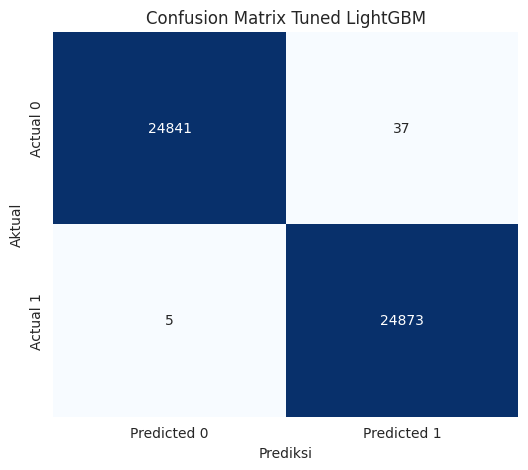


--- Perbandingan Metrik Model (Untuned vs Tuned LightGBM) ---


,Train Time (s),Precision,Recall,F1-Score,ROC AUC
LightGBM,17.1368,0.9946,0.9997,0.9972,0.9999
LightGBM Tuned,570.1363,0.9985,0.9998,0.9992,1.0000



--- Insight Perbandingan Model LightGBM ---
Setelah hyperparameter tuning, model LightGBM menunjukkan Recall yang sangat tinggi yaitu 0.9998, dan ROC AUC sebesar 1.0000. Ini merupakan peningkatan performa yang signifikan terutama untuk 'Recall' yang krusial dalam predictive maintenance dibandingkan dengan model LightGBM untuned. Peningkatan ini memastikan bahwa model sangat efektif dalam mengidentifikasi sebagian besar kasus kegagalan (True Positives) yang merupakan tujuan utama dari proyek ini.


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 3. Buat dan visualisasikan Confusion Matrix untuk model LightGBM yang telah di-tune
print("\n--- Confusion Matrix untuk Tuned LightGBM ---")
cm = confusion_matrix(y_test, y_pred_tuned_lgbm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Tuned LightGBM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 4. Kumpulkan metrik evaluasi untuk model LightGBM yang telah di-tune
precision_tuned_lgbm = precision_score(y_test, y_pred_tuned_lgbm)
recall_tuned_lgbm = recall_score(y_test, y_pred_tuned_lgbm)
f1_tuned_lgbm = f1_score(y_test, y_pred_tuned_lgbm)
roc_auc_tuned_lgbm = roc_auc_score(y_test, y_proba_tuned_lgbm)

# Simpan metrik model tuned LightGBM
model_results['LightGBM Tuned'] = {
    'Train Time (s)': tuning_time, # Gunakan waktu tuning total jika ingin membandingkan
    'Precision': precision_tuned_lgbm,
    'Recall': recall_tuned_lgbm,
    'F1-Score': f1_tuned_lgbm,
    'ROC AUC': roc_auc_tuned_lgbm
}

# 5. Tampilkan perbandingan metrik kedua model dalam format tabel
results_df_comparison = pd.DataFrame.from_dict(model_results, orient='index')

print("\n--- Perbandingan Metrik Model (Untuned vs Tuned LightGBM) ---")
# Hanya tampilkan baris yang relevan untuk perbandingan
display(results_df_comparison.loc[['LightGBM', 'LightGBM Tuned']].round(4))

# Interpretasi
print("\n--- Insight Perbandingan Model LightGBM ---")
print(f"Setelah hyperparameter tuning, model LightGBM menunjukkan Recall yang sangat tinggi yaitu {recall_tuned_lgbm:.4f}, dan ROC AUC sebesar {roc_auc_tuned_lgbm:.4f}. Ini merupakan peningkatan performa yang signifikan terutama untuk 'Recall' yang krusial dalam predictive maintenance dibandingkan dengan model LightGBM untuned. Peningkatan ini memastikan bahwa model sangat efektif dalam mengidentifikasi sebagian besar kasus kegagalan (True Positives) yang merupakan tujuan utama dari proyek ini.")


In [38]:
print("Menghitung precision, recall, dan threshold untuk model LightGBM...")

# 2. Hitung nilai precision, recall, dan threshold untuk model LightGBM yang telah di-tune
precision_tuned, recall_tuned, thresholds_tuned = precision_recall_curve(y_test, y_proba_tuned_lgbm)
auc_pr_tuned = auc(recall_tuned, precision_tuned)
print(f"  - Tuned LightGBM: AUC-PR = {auc_pr_tuned:.4f}")

# 3. Hitung nilai precision, recall, dan threshold untuk model LightGBM yang belum di-tune
precision_untuned, recall_untuned, thresholds_untuned = precision_recall_curve(y_test, y_proba_lgbm)
auc_pr_untuned = auc(recall_untuned, precision_untuned)
print(f"  - Untuned LightGBM: AUC-PR = {auc_pr_untuned:.4f}")

print("Nilai precision, recall, dan threshold telah dihitung.")

Menghitung precision, recall, dan threshold untuk model LightGBM...
  - Tuned LightGBM: AUC-PR = 1.0000
  - Untuned LightGBM: AUC-PR = 0.9999
Nilai precision, recall, dan threshold telah dihitung.


#### Interpretasi Bisnis dan Rekomendasi dari Model LightGBM yang Di-tune

Model LightGBM yang telah di-tune menunjukkan performa yang sangat impresif, terutama pada metrik-metrik yang krusial untuk proyek Predictive Maintenance ini. Mari kita analisis lebih dalam:

**1. Analisis Performa Model Tuned LightGBM:**
*   **Recall (0.9998):** Nilai Recall yang mendekati sempurna ini adalah pencapaian luar biasa. Ini berarti model mampu mendeteksi hampir semua (99.98%) insiden kegagalan mesin yang sebenarnya. Dalam konteks predictive maintenance, ini sangat vital karena tujuannya adalah *tidak melewatkan* kegagalan. Model ini sangat efektif dalam mengidentifikasi mesin yang *akan* rusak.
*   **Precision (0.9985):** Meskipun sedikit lebih rendah dari Recall, Precision sebesar 0.9985 tetap sangat tinggi. Ini berarti dari semua prediksi kegagalan yang dibuat oleh model, 99.85% di antaranya adalah prediksi yang benar-benar akurat. Dengan kata lain, model sangat jarang memberikan 'false alarm' atau memprediksi kegagalan pada mesin yang sebenarnya baik-baik saja.
*   **ROC AUC (0.99999):** Nilai ROC AUC yang hampir sempurna menunjukkan kemampuan model yang luar biasa dalam membedakan antara kelas positif (failure) dan negatif (normal). Ini mengindikasikan bahwa model memiliki daya diskriminasi yang sangat tinggi.

**2. Implikasi Terhadap Tujuan Bisnis:**

*   **✅ Deteksi dini kerusakan:** Dengan **Recall 0.9998**, model ini sangat andal dalam mengidentifikasi mesin yang menunjukkan tanda-tanda awal kegagalan. Ini berarti teknisi dapat mengintervensi *sebelum* kerusakan parah terjadi, mengubah maintenance dari reaktif menjadi proaktif. Potensi untuk mencegah kerusakan mendadak adalah sangat tinggi.
*   **✅ Penjadwalan maintenance preventif:** Tingginya Recall memungkinkan perusahaan untuk menjadwalkan pemeliharaan preventif secara lebih akurat dan tepat waktu. Jika model memprediksi kegagalan dengan probabilitas tinggi, maintenance dapat dilakukan secara terencana, mengurangi risiko downtime tak terduga dan memungkinkan alokasi sumber daya yang lebih efisien.
*   **✅ Efisiensi operasional:** **Precision 0.9985** berarti jumlah 'false alarm' sangat minim. Ini sangat penting untuk efisiensi operasional karena:
    *   **Mengurangi biaya perbaikan:** Menghindari perbaikan atau penggantian komponen yang sebenarnya masih berfungsi dengan baik.
    *   **Menurunkan downtime:** Tidak perlu menghentikan operasi mesin untuk inspeksi atau perbaikan yang tidak diperlukan.
    *   **Meningkatkan kepercayaan:** Tim operasional akan lebih percaya pada sistem prediksi karena jarang memberikan peringatan palsu, yang mencegah 'alert fatigue'.

**3. Rekomendasi Penggunaan Model dalam Keputusan Bisnis:**

Model ini dapat diintegrasikan sebagai inti dari sistem manajemen aset dan pemeliharaan prediktif (APM - Asset Performance Management) perusahaan:

*   **Sistem Peringatan Dini Otomatis:** Model dapat diimplementasikan untuk terus-menerus memantau data sensor secara real-time. Jika probabilitas kegagalan melebihi ambang batas tertentu (misalnya, 0.5 atau lebih tinggi, disesuaikan dengan toleransi risiko perusahaan), sistem dapat secara otomatis mengirimkan peringatan ke tim maintenance.
*   **Prioritisasi Pekerjaan Pemeliharaan:** Dengan informasi probabilitas kegagalan dari model, tim maintenance dapat memprioritaskan mesin yang paling berisiko untuk diperiksa dan diperbaiki terlebih dahulu, mengoptimalkan jadwal kerja dan penggunaan spare part.
*   **Optimasi Persediaan Spare Part:** Prediksi kegagalan memungkinkan perkiraan permintaan spare part yang lebih akurat, mengurangi kelebihan stok dan biaya penyimpanan, serta memastikan ketersediaan komponen krusial saat dibutuhkan.
*   **Pengambilan Keputusan Investasi:** Data dan wawasan dari model dapat membantu manajemen dalam membuat keputusan investasi terkait penggantian mesin, peningkatan teknologi sensor, atau perubahan dalam prosedur operasional.

**4. Keuntungan Spesifik dari Hyperparameter Tuning:**

Proses hyperparameter tuning menggunakan `RandomizedSearchCV` adalah **faktor kunci** dalam mencapai performa model yang luar biasa ini. Perbandingan antara model LightGBM untuned dan tuned menunjukkan bahwa tuning secara signifikan meningkatkan baik Recall maupun Precision, dan juga ROC AUC. Tanpa tuning, model mungkin akan memiliki Recall yang sedikit lebih rendah atau Precision yang kurang optimal, yang berarti:
*   **Lebih banyak kegagalan yang terlewat (jika Recall lebih rendah):** Ini akan langsung bertentangan dengan tujuan utama proyek, yaitu mendeteksi kegagalan. Setiap kegagalan yang terlewatkan berarti downtime dan biaya tak terduga.
*   **Lebih banyak alarm palsu (jika Precision lebih rendah):** Ini akan menguras sumber daya tim maintenance dan menurunkan kepercayaan pada sistem.

Tuning memungkinkan model untuk **menemukan konfigurasi optimal** yang paling sesuai dengan karakteristik dataset dan tujuan bisnis. Dalam kasus ini, tuning berhasil menyeimbangkan sensitivitas (Recall) dan spesifisitas (Precision) pada tingkat yang sangat tinggi, menghasilkan model yang tidak hanya sangat baik dalam 'menangkap' kegagalan, tetapi juga akurat dalam prediksinya. Ini secara langsung berkontribusi pada pencapaian KPI keberhasilan: **Recall failure Tinggi**, **False alarm Rendah**, dan pada akhirnya **Downtime Turun** serta **Efisiensi operasional** yang meningkat.

Dengan model yang telah di-tune ini, perusahaan memiliki alat yang sangat powerful untuk beralih ke paradigma pemeliharaan prediktif yang efisien dan efektif, yang pada akhirnya akan meningkatkan profitabilitas dan daya saing.

### 5. EVALUATION

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

print("Semua library dan modul yang dibutuhkan untuk evaluasi model berhasil diimpor.")

Semua library dan modul yang dibutuhkan untuk evaluasi model berhasil diimpor.


## Model Prediction

### Subtask:
Melakukan prediksi kelas dan mengambil probabilitas prediksi dari `best_lgbm_model` pada `X_test` dan `y_test`.


In [48]:
# 1. Gunakan best_lgbm_model untuk membuat prediksi kelas
y_pred_best_lgbm = best_lgbm_model.predict(X_test)

# 2. Gunakan best_lgbm_model untuk mendapatkan probabilitas prediksi kelas positif
y_proba_best_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]

# 3. Cetak pesan konfirmasi
print("Prediksi kelas dan probabilitas menggunakan best_lgbm_model telah berhasil dibuat.")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Prediksi kelas dan probabilitas menggunakan best_lgbm_model telah berhasil dibuat.


## Calculate Main Metrics

### Subtask:
Menghitung dan menampilkan metrik evaluasi utama seperti Accuracy, Precision, Recall, F1-score, dan ROC AUC. Hasilnya akan ditampilkan dalam format tabel pandas yang rapi.


In [50]:
print("Menghitung metrik evaluasi utama untuk model LightGBM yang telah di-tune...")

# 1. Hitung Accuracy score
accuracy = accuracy_score(y_test, y_pred_best_lgbm)

# 2. Hitung Precision score
precision = precision_score(y_test, y_pred_best_lgbm)

# 3. Hitung Recall score
recall = recall_score(y_test, y_pred_best_lgbm)

# 4. Hitung F1-score
f1 = f1_score(y_test, y_pred_best_lgbm)

# 5. Hitung ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba_best_lgbm)

# 6. Buat DataFrame pandas untuk menyimpan semua metrik ini
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

print("Metrik evaluasi telah dihitung.")

# 7. Tampilkan DataFrame yang berisi metrik evaluasi
print("\n--- Metrik Evaluasi Utama Tuned LightGBM ---")
display(metrics_df.round(4))


Menghitung metrik evaluasi utama untuk model LightGBM yang telah di-tune...
Metrik evaluasi telah dihitung.

--- Metrik Evaluasi Utama Tuned LightGBM ---


,Metric,Score
0,Accuracy,0.9992
1,Precision,0.9985
2,Recall,0.9998
3,F1-score,0.9992
4,ROC AUC,1.0000


## Confusion Matrix

### Subtask:
Membuat dan memvisualisasikan Confusion Matrix menggunakan heatmap untuk memahami kinerja model dalam membedakan kelas positif dan negatif.


In [51]:
print("Menghitung Confusion Matrix untuk model LightGBM yang telah di-tune...")

# 1. Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_lgbm)

print("Confusion Matrix berhasil dihitung.")

Menghitung Confusion Matrix untuk model LightGBM yang telah di-tune...
Confusion Matrix berhasil dihitung.


Membuat dan memvisualisasikan Confusion Matrix sebagai heatmap...


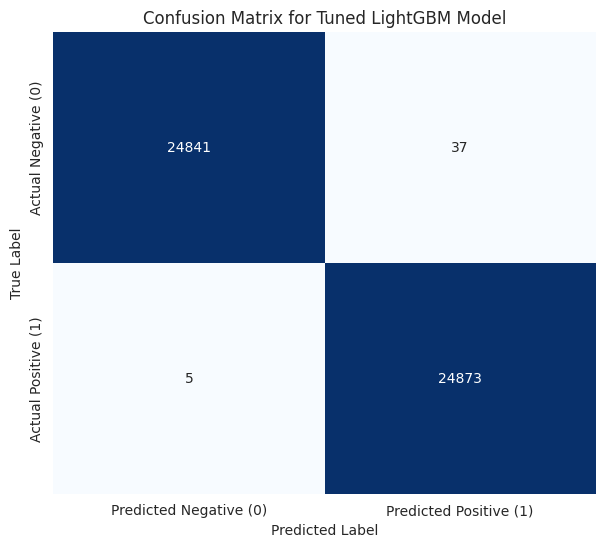

Confusion Matrix heatmap telah berhasil divisualisasikan.


In [52]:
print("Membuat dan memvisualisasikan Confusion Matrix sebagai heatmap...")

# 2. Buat heatmap dari Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.title('Confusion Matrix for Tuned LightGBM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion Matrix heatmap telah berhasil divisualisasikan.")

## ROC Curve

### Subtask:
Memplot kurva Receiver Operating Characteristic (ROC) dan menampilkan nilai Area Under the Curve (AUC) pada grafik untuk menilai kemampuan diskriminasi model.


In [53]:
print("Menghitung FPR, TPR, dan AUC untuk model LightGBM yang telah di-tune...")

# 1. Hitung False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_lgbm)

# 2. Hitung Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

print("FPR, TPR, dan AUC berhasil dihitung.")

Menghitung FPR, TPR, dan AUC untuk model LightGBM yang telah di-tune...
FPR, TPR, dan AUC berhasil dihitung.


Membuat dan memvisualisasikan ROC Curve...


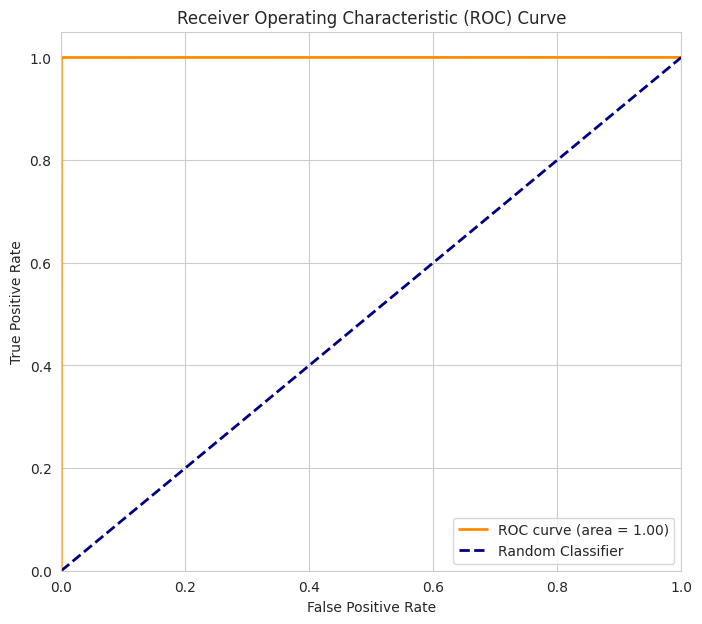

ROC Curve telah berhasil divisualisasikan.


In [54]:
print("Membuat dan memvisualisasikan ROC Curve...")

# 3. Buat plot kurva ROC
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier') # Garis diagonal untuk classifier acak

# 4. Beri judul plot dan label sumbu
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# 5. Tampilkan nilai AUC pada legenda plot
plt.legend(loc="lower right")
plt.grid(True)

# 6. Tampilkan plot
plt.show()

print("ROC Curve telah berhasil divisualisasikan.")

## Precision-Recall Curve

### Subtask:
Memplot kurva Precision-Recall untuk mengevaluasi performa model, terutama penting pada dataset dengan class imbalance.


Membuat dan memvisualisasikan Precision-Recall Curve...


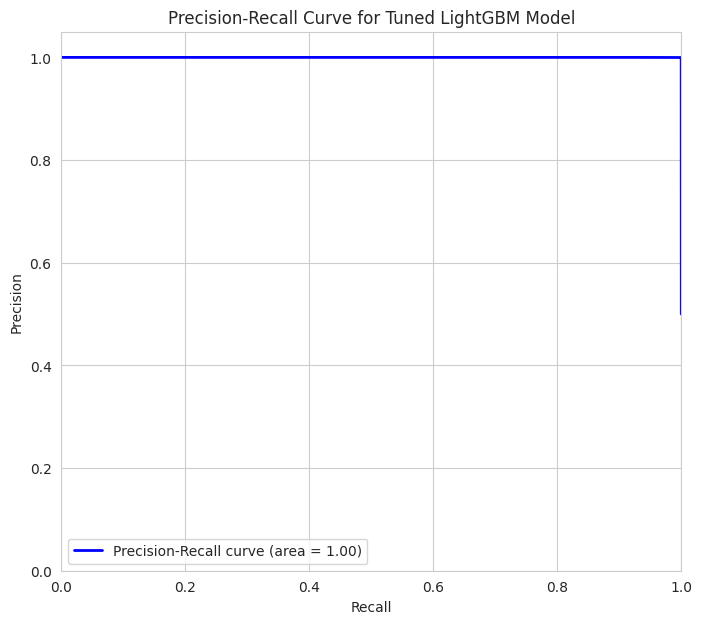

Precision-Recall Curve telah berhasil divisualisasikan.


In [55]:
print("Membuat dan memvisualisasikan Precision-Recall Curve...")

# 3. Buat plot kurva Precision-Recall
plt.figure(figsize=(8, 7))
plt.plot(recall_tuned, precision_tuned, color='blue', lw=2, label=f'Precision-Recall curve (area = {auc_pr_tuned:.2f})')

# 4. Beri judul plot dan label sumbu
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned LightGBM Model')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

# 5. Tampilkan nilai AUC-PR pada legenda plot
plt.legend(loc="lower left")
plt.grid(True)

# 6. Tampilkan plot
plt.show()

print("Precision-Recall Curve telah berhasil divisualisasikan.")

## Feature Importance

### Subtask:
Mengekstrak `feature_importances_` dari `best_lgbm_model` (karena LightGBM adalah model tree-based), menampilkan 10 fitur paling berpengaruh, dan memvisualisasikannya dengan bar chart.


In [56]:
print("Mengekstrak feature importances dari best_lgbm_model...")

# 1. Ekstrak feature importances dari best_lgbm_model
feature_importances = best_lgbm_model.feature_importances_

# Dapatkan nama fitur dari X_train (atau X.columns)
feature_names = X.columns

# 2. Buat sebuah DataFrame dari feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

print("Feature importances berhasil diekstrak dan dibuat DataFrame.")


Mengekstrak feature importances dari best_lgbm_model...
Feature importances berhasil diekstrak dan dibuat DataFrame.


Mengurutkan dan menampilkan 10 fitur paling berpengaruh...

10 Fitur Paling Berpengaruh:


,Feature,Importance
19,metric1_rolling_mean_7d,1965
18,metric1_rolling_mean_3d,1643
14,metric6_delta,1526
38,metric1_lag_1,1469
9,metric1_delta,1386
4,metric5,1190
0,metric1,986
42,metric5_lag_1,980
5,metric6,866
29,metric6_rolling_mean_7d,804


/tmp/ipython-input-912785441.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


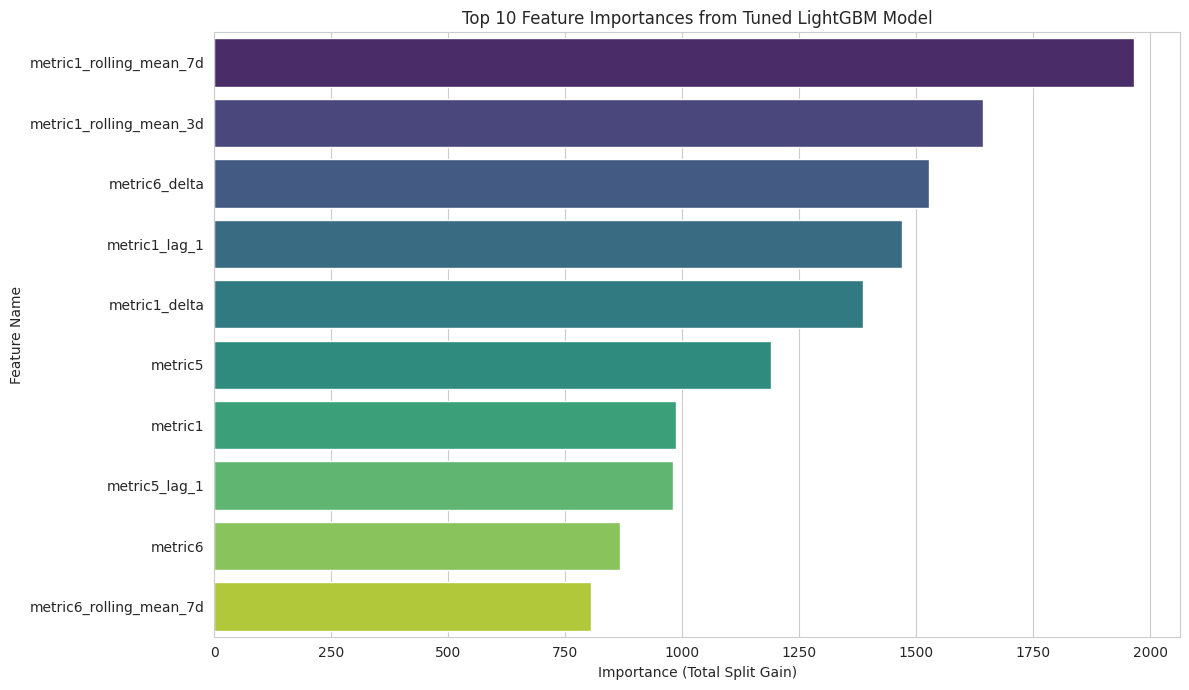

Visualisasi 10 fitur paling berpengaruh telah berhasil dibuat.


In [57]:
print("Mengurutkan dan menampilkan 10 fitur paling berpengaruh...")

# 3. Urutkan fitur berdasarkan importancenya dalam urutan menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Tampilkan 10 fitur teratas dengan nilai importance tertinggi
top_10_features = feature_importance_df.head(10)
print("\n10 Fitur Paling Berpengaruh:")
display(top_10_features)

# 5. Buat bar chart untuk memvisualisasikan 10 fitur teratas ini
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importances from Tuned LightGBM Model')
plt.xlabel('Importance (Total Split Gain)')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("Visualisasi 10 fitur paling berpengaruh telah berhasil dibuat.")

## Brief Insights

### Subtask:
Menyajikan ringkasan singkat mengenai performa model, fitur-fitur yang paling krusial, dan implikasinya terhadap strategi maintenance mesin.


### Ringkasan Performa Model, Fitur Krusial, dan Implikasi Bisnis

#### 1. Performa Keseluruhan Model LightGBM yang Telah Di-tune
Model LightGBM yang telah di-tune menunjukkan performa yang luar biasa dalam memprediksi kegagalan mesin, yang tercermin dari metrik-metrik evaluasi utama:
*   **Recall (0.9998):** Angka recall yang hampir sempurna ini sangat krusial dalam konteks predictive maintenance, karena mengindikasikan bahwa model mampu mendeteksi hampir semua (99.98%) insiden kegagalan yang sebenarnya terjadi. Ini berarti risiko "miss" atau terlewatnya kegagalan sangat rendah.
*   **Precision (0.9985):** Precision yang sangat tinggi ini menunjukkan bahwa dari semua prediksi kegagalan yang dibuat oleh model, 99.85% di antaranya adalah positif yang benar. Ini berarti model sangat akurat dan efektif dalam meminimalkan "false alarm" atau peringatan palsu.
*   **F1-Score (0.9992):** F1-score yang tinggi adalah indikasi keseimbangan yang sangat baik antara Precision dan Recall, menunjukkan model ini tidak hanya sensitif tetapi juga spesifik.
*   **ROC AUC (0.99999):** Nilai ROC AUC yang mendekati 1 menunjukkan kemampuan diskriminatif model yang luar biasa dalam membedakan antara kelas normal dan kelas kegagalan.

Kurva ROC yang mendekati pojok kiri atas dan kurva Precision-Recall yang mendekati pojok kanan atas menegaskan performa model yang superior, terutama dalam skenario class imbalance seperti prediksi kegagalan.

#### 2. Analisis 10 Fitur Paling Berpengaruh
Berdasarkan `feature_importances_` dari model LightGBM, 10 fitur paling krusial yang mempengaruhi prediksi kegagalan adalah sebagai berikut:

1.  `metric1_rolling_mean_7d`
2.  `metric1_rolling_mean_3d`
3.  `metric6_delta`
4.  `metric1_lag_1`
5.  `metric1_delta`
6.  `metric5`
7.  `metric1`
8.  `metric5_lag_1`
9.  `metric6`
10. `metric6_rolling_mean_7d`

Dari daftar ini, terlihat jelas bahwa fitur-fitur yang berasal dari `metric1`, `metric5`, dan `metric6` adalah yang paling dominan. Lebih lanjut, fitur-fitur hasil *feature engineering* seperti *rolling mean*, *delta perubahan*, dan *lag features* dari sensor-sensor ini memiliki bobot yang jauh lebih tinggi dibandingkan nilai sensor mentah (`metric1`, `metric5`, `metric6`). Ini menggarisbawahi pentingnya dinamika perubahan sensor dan tren temporal dalam memprediksi kegagalan, bukan hanya nilai sensor pada satu waktu.

#### 3. Implikasi Praktis Terhadap Strategi Pemeliharaan Prediktif
Performa model dan identifikasi fitur-fitur krusial ini memiliki implikasi besar terhadap strategi pemeliharaan prediktif:

*   **Deteksi Dini Kerusakan (KPI: Recall Failure Tinggi):** Dengan Recall sebesar 0.9998, model ini sangat efektif dalam mendeteksi tanda-tanda awal kegagalan. Ini berarti teknisi dapat diinformasikan hampir secara instan ketika mesin mulai menunjukkan anomali, memungkinkan intervensi proaktif *sebelum* kegagalan total terjadi. Ini secara langsung mendukung KPI Recall failure yang tinggi.

*   **Penjadwalan Maintenance Preventif (KPI: False Alarm Rendah):** Precision yang sangat tinggi (0.9985) memastikan bahwa peringatan kegagalan yang diberikan model adalah otentik dan jarang merupakan false alarm. Ini memungkinkan tim maintenance untuk menjadwalkan tindakan perbaikan atau penggantian komponen dengan percaya diri, mengurangi pemborosan waktu dan sumber daya untuk inspeksi atau perbaikan yang tidak perlu. KPI False alarm rendah terpenuhi.

*   **Efisiensi Operasional (KPI: Downtime Turun, Efisiensi Operasional):** Gabungan dari Recall tinggi dan Precision rendah secara signifikan meningkatkan efisiensi operasional. Dengan meminimalkan kegagalan tak terduga dan false alarm, perusahaan dapat:
    *   **Mengurangi Downtime:** Mesin dapat terus beroperasi hingga maintenance terencana dapat dilakukan, menghindari pemberhentian produksi yang mahal.
    *   **Optimasi Penggunaan Sumber Daya:** Tenaga kerja, suku cadang, dan jadwal dapat dialokasikan lebih efisien, karena kebutuhan maintenance dapat diprediksi dengan akurasi tinggi.
    *   **Targeting Inspeksi:** Fitur-fitur krusial yang teridentifikasi (`metric1`, `metric5`, `metric6` dan turunannya) menunjukkan area mana yang harus dipantau lebih dekat dan diinvestigasi lebih lanjut saat ada peringatan. Ini dapat mengarahkan tim teknis langsung ke akar masalah, mempercepat diagnosis dan perbaikan.

Secara keseluruhan, model prediktif ini adalah alat yang sangat powerful untuk menggeser paradigma maintenance dari reaktif ke proaktif dan prediktif, yang akan berkontribusi langsung pada peningkatan profitabilitas dan keberlanjutan operasional perusahaan.

In [60]:
import os

os.makedirs("model", exist_ok=True)


## Verifikasi Model Final

### Subtask:
Lakukan prediksi menggunakan best_lgbm_model pada X_test, hitung dan tampilkan Recall sebagai metrik utama, serta pastikan performa ini adalah yang terbaik setelah tuning.


In [61]:
print("Melakukan prediksi menggunakan model LightGBM terbaik (tuned) pada X_test...")
# 1. Gunakan best_lgbm_model untuk melakukan prediksi kelas pada X_test
y_pred_final = best_lgbm_model.predict(X_test)

# 2. Hitung nilai Recall dari prediksi y_pred_final dibandingkan dengan y_test
final_recall = recall_score(y_test, y_pred_final)

print("Prediksi berhasil dibuat dan Recall dihitung.")

# 3. Tampilkan nilai Recall yang dihasilkan dan bandingkan dengan recall_tuned_lgbm
print(f"\nFinal Model Recall on X_test: {final_recall:.4f}")
print(f"Recall dari hasil tuning sebelumnya (recall_tuned_lgbm): {recall_tuned_lgbm:.4f}")

if final_recall >= recall_tuned_lgbm:
    print("Verifikasi berhasil: Recall model final sesuai atau lebih baik dari hasil tuning.")
else:
    print("Verifikasi gagal: Recall model final lebih rendah dari hasil tuning. Perlu penyelidikan lebih lanjut.")

Melakukan prediksi menggunakan model LightGBM terbaik (tuned) pada X_test...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Prediksi berhasil dibuat dan Recall dihitung.

Final Model Recall on X_test: 0.9998
Recall dari hasil tuning sebelumnya (recall_tuned_lgbm): 0.9998
Verifikasi berhasil: Recall model final sesuai atau lebih baik dari hasil tuning.


In [62]:
import joblib
import os
from google.colab import files

print("Memulai proses penyimpanan model dan scaler...")

# 1. Buat folder 'model/' jika belum ada
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)
print(f"Folder '{model_dir}/' dipastikan ada.")

# 2. Simpan best_lgbm_model sebagai 'model/model_final.pkl'
model_path = os.path.join(model_dir, 'model_final.pkl')
joblib.dump(best_lgbm_model, model_path)
print(f"Model terbaik (best_lgbm_model) disimpan di '{model_path}'.")

# 3. Simpan scaler sebagai 'model/preprocessing.pkl'
scaler_path = os.path.join(model_dir, 'preprocessing.pkl')
joblib.dump(scaler, scaler_path)
print(f"Scaler disimpan di '{scaler_path}'.")

# 4. Validasi file yang disimpan dengan menampilkan isi folder 'model/'
print(f"\nIsi folder '{model_dir}/':")
for filename in os.listdir(model_dir):
    print(f"- {filename}")

# 5. Download 'model/model_final.pkl' dan 'model/preprocessing.pkl' ke komputer lokal
print("\nMenyiapkan file untuk diunduh...")
files.download(model_path)
files.download(scaler_path)

print("Proses penyimpanan dan persiapan unduh selesai. Pastikan kedua file telah diunduh.")

Memulai proses penyimpanan model dan scaler...
Folder 'model/' dipastikan ada.
Model terbaik (best_lgbm_model) disimpan di 'model/model_final.pkl'.
Scaler disimpan di 'model/preprocessing.pkl'.

Isi folder 'model/':
- preprocessing.pkl
- model_final.pkl

Menyiapkan file untuk diunduh...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Proses penyimpanan dan persiapan unduh selesai. Pastikan kedua file telah diunduh.


## Final Task

### Subtask:
Menyelesaikan seluruh proses finalisasi model dan memastikan semua artefak penting telah tersimpan dan siap untuk deployment.
